# ENC calculator based on UCSD's data format
This notebook aims for ENC calculation based on UCSD's data format.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from CryoAsicENC import ENC_calculator

/Users/yumiao/Documents/Works/0nbb/nEXO/Reconstruction/waveform/cryo-asic-analysis/CryoAsicENC.py:136: RuntimeWarning: invalid value encountered in sqrt
  Vorms_FE = np.where(Vorms_FC > self.adc_vrms, np.sqrt(Vorms_FC**2 - self.adc_vrms**2), 0 )


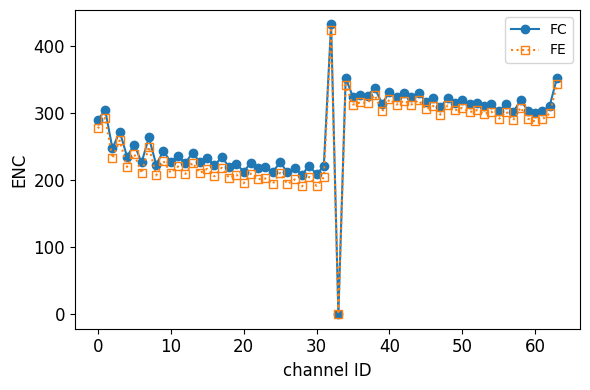

In [2]:
# example for a single file calculation:

config = config = {'capacitance_1': 22, 'capacitance_2': 39}
calc = ENC_calculator(config)

# one must set the FE setting and filename to it:
calc.set_FEset('928')
# sepecify the path and filename here:
filename = '/Users/yumiao/Documents/Works/0nbb/nEXO/ASIC_SLAC/Data/UCSD/Gaseous Xenon/noise_csvs/FE928_noise.csv'
calc.set_filename(filename)

# load csv file
calc.load_noise_csv()
# calculate FC ENC and FE ENC:
calc.ENC_FC()
calc.ENC_FE()

# plot both FC ENC and FE ENC for one board (64channels) under one condition and FE setting.
_, ax = plt.subplots(figsize=(6, 4))
ax.plot(calc.enc_fc, 'o-', label="FC")
ax.plot(calc.enc_fe, 's:', fillstyle='none', label='FE')
ax.set_xlabel('channel ID', fontsize=12)
ax.set_ylabel('ENC', fontsize=12)
ax.tick_params(axis='both', labelsize=12)
ax.legend()
plt.tight_layout()

In [2]:
# Here I define these dictionarys so one can get the FE setting number by querying the dictionary with the format 'a.busc.dX' (a.b for the peaking time, c.d for the gain, e.g. '1.2us3.0X')
# FE set arrays for different fixed setting:
config_dict = { '1.0X': ['896', '900', '904', '908'], \
                '1.5X': ['912', '916', '920', '924'], \
                '3.0X': ['928', '932', '936', '940'], \
                '6.0X': ['944', '948', '952', '956'], \
                '0.6us': ['896', '912', '928', '944'], \
                '1.2us': ['900', '916', '932', '948'], \
                '2.4us': ['904', '920', '936', '952'], \
                '3.6us': ['908', '924', '940', '956'] }

# FE set number for specific settings.
FEset_dict = { \
                    '0.6us1.0X' : '896', \
                    '1.2us1.0X' : '900' , \
                    '2.4us1.0X' : '904', \
                    '3.6us1.0X' : '908', \
                    '0.6us1.5X' : '912', \
                    '1.2us1.5X' : '916' , \
                    '2.4us1.5X' : '920' , \
                    '3.6us1.5X' : '924', \
                    '0.6us3.0X' : '928', \
                    '1.2us3.0X' : '932', \
                    '2.4us3.0X' : '936', \
                    '3.6us3.0X' : '940', \
                    '0.6us6.0X' : '944', \
                    '1.2us6.0X' : '948', \
                    '2.4us6.0X' : '952', \
                    '3.6us6.0X' : '956', \
                    }

FEset_inv_dict = { \
                    '896' : '0.6us1.0X' , \
                    '900' : '1.2us1.0X' , \
                    '904' : '2.4us1.0X' , \
                    '908' : '3.6us1.0X' , \
                    '912' : '0.6us1.5X' , \
                    '916' : '1.2us1.5X' , \
                    '920' : '2.4us1.5X' , \
                    '924' : '3.6us1.5X' , \
                    '928' : '0.6us3.0X' , \
                    '932' : '1.2us3.0X' , \
                    '936' : '2.4us3.0X' , \
                    '940' : '3.6us3.0X' , \
                    '944' : '0.6us6.0X' , \
                    '948' : '1.2us6.0X' , \
                    '952' : '2.4us6.0X' , \
                    '956' : '3.6us6.0X' , \
                    }

In [11]:
# Interfaces for calculation FC or FE ENC for one bank of one board with one specific FE setting under one condition
import numpy as np
import matplotlib.pyplot as plt
from CryoAsicENC import ENC_calculator

def calc_ENC_specifiedFEset(prefix_path:str, condition:str, bank:int, feset: str, feset_num:int, FE_flag=False, ymin=0, ymax=1000, drawBoth=False):
    '''
    prefix_path: the absolute path where the data is stored;
    condition: also serves as the sub-diectory which describes the test condition, e.g., Gaseous Xenon, Liquid Xenon 171K USB out...
    bank: 0 or 1, to specify which asic0 or asic1;
    feset: string which describes peaking time and gain sets on FE;
    feset_num: integer for the FE setting;
    FE_flag: if true, we calculate the Front-End ENC, otherwise the full chain ENC;
    ymin, ymax: set the range of y-axis for better visualisation.
    '''
    config = config = {'capacitance_1': 22, 'capacitance_2': 39}
    calc = ENC_calculator(config)
    calc.set_FEset(feset_num)
    calc.set_filename(prefix_path + f'FE{feset_num}_noise.csv')
    calc.load_noise_csv()
    calc.ENC_FC()
    calc.ENC_FE()

    fig, ax = plt.subplots(figsize=(7, 5))
    chaid = np.arange(0, 32, 1)
    if FE_flag:
        fe_enc = calc.enc_fe[0+32*bank:32+32*bank]
        ax.plot(chaid[fe_enc != 0], fe_enc[fe_enc != 0], 'o-', ms=8, lw=2, )
        ax.set_ylabel(r'FE ENC [$e^-$]', fontsize=14)
    else:    
        fc_enc = calc.enc_fc[0+32*bank:32+32*bank]
        ax.plot(chaid[fc_enc != 0], fc_enc[fc_enc != 0], 'o-', color='darkorange', ms=8, lw=2)
        ax.set_ylabel(r'FC ENC [$e^-$]', fontsize=14)
        if drawBoth:
            fe_enc = calc.enc_fe[0+32*bank:32+32*bank]
            ax.plot(chaid[fe_enc != 0], fe_enc[fe_enc != 0], 'd-.', ms=6, lw=2, )
            ax.set_ylabel(r'ENC [$e^-$]', fontsize=14)
    ax.set_xlabel('Channel Id', fontsize=14)
    cin = 22 if bank == 0 else 39
    ax.set_title(condition + ', ' + feset + f', {cin} pF' , fontsize=14) 
    ax.set_ylim(ymin, ymax)
    ax.tick_params(axis='both', labelsize=13)

    ax.grid(linestyle=':')
    plt.tight_layout()
    return fig



/Users/yumiao/Documents/Works/0nbb/nEXO/Reconstruction/waveform/cryo-asic-analysis/CryoAsicENC.py:136: RuntimeWarning: invalid value encountered in sqrt
  Vorms_FE = np.where(Vorms_FC > self.adc_vrms, np.sqrt(Vorms_FC**2 - self.adc_vrms**2), 0 )
/Users/yumiao/Documents/Works/0nbb/nEXO/Reconstruction/waveform/cryo-asic-analysis/CryoAsicENC.py:136: RuntimeWarning: invalid value encountered in sqrt
  Vorms_FE = np.where(Vorms_FC > self.adc_vrms, np.sqrt(Vorms_FC**2 - self.adc_vrms**2), 0 )
/Users/yumiao/Documents/Works/0nbb/nEXO/Reconstruction/waveform/cryo-asic-analysis/CryoAsicENC.py:136: RuntimeWarning: invalid value encountered in sqrt
  Vorms_FE = np.where(Vorms_FC > self.adc_vrms, np.sqrt(Vorms_FC**2 - self.adc_vrms**2), 0 )
/Users/yumiao/Documents/Works/0nbb/nEXO/Reconstruction/waveform/cryo-asic-analysis/CryoAsicENC.py:136: RuntimeWarning: invalid value encountered in sqrt
  Vorms_FE = np.where(Vorms_FC > self.adc_vrms, np.sqrt(Vorms_FC**2 - self.adc_vrms**2), 0 )


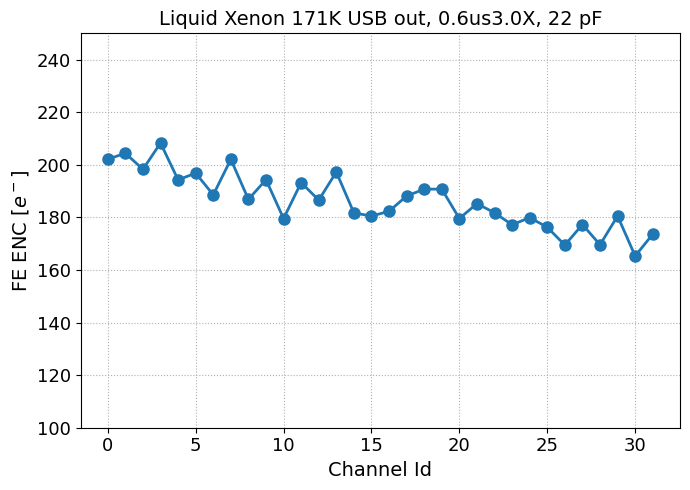

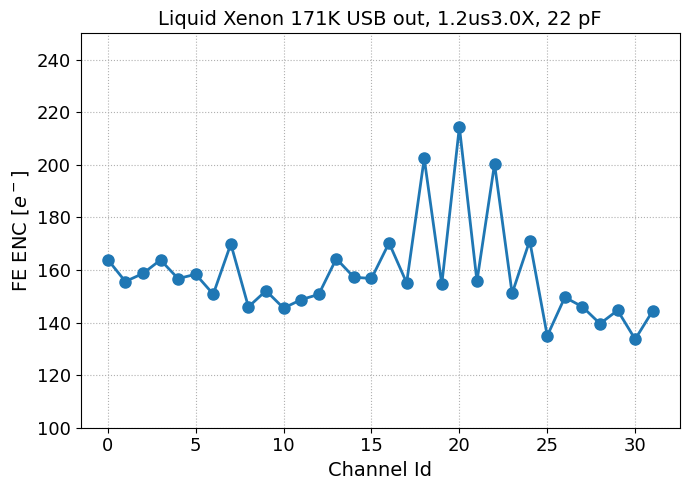

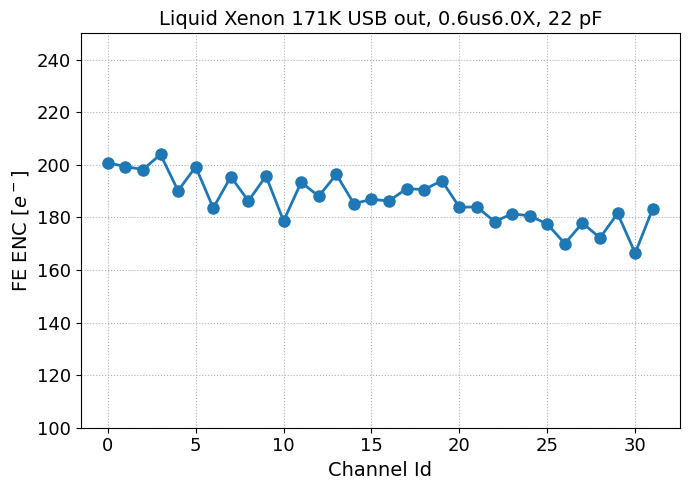

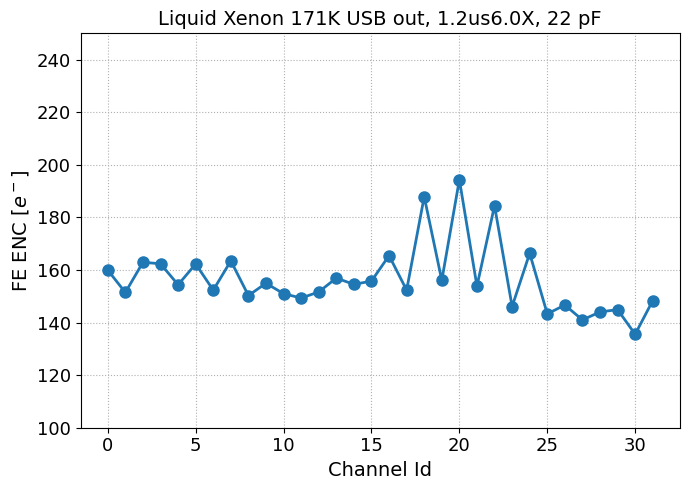

In [22]:
# Batch processing, different FEset for one bank, saving output plots
condition = 'Liquid Xenon 171K USB out'
path = f'/Users/yumiao/Documents/Works/0nbb/nEXO/ASIC_SLAC/Data/UCSD/{condition}/noise_csvs/'
bank = 0
fe_flag = True
for feset in ['0.6us3.0X', '1.2us3.0X', '0.6us6.0X', '1.2us6.0X']:
    feset_num = FEset_dict[feset]
    fig = calc_ENC_specifiedFEset(path, condition, bank, feset, feset_num, fe_flag, ymin=100, ymax=250, drawBoth=False);
    mark = 'FE' if fe_flag else 'FC' 
    fig.savefig(path + f'../ENC/{mark}ENC_{feset}_bank{bank}.pdf')

In [16]:
# ENC vs Peaking time / Gains with fixed Gain / Peaking time
import numpy as np
import matplotlib.pyplot as plt
from CryoAsicENC import ENC_calculator

def ENC_vs_variables(path, condition, bank, feset, feset_nums, fix, fe_flag, band=False):
    config = config = {'capacitance_1': 22, 'capacitance_2': 39}
    calc = ENC_calculator(config)
    variables = [r'0.6$\mu s$', r'1.2$\mu s$', r'2.4$\mu s$', r'3.6$\mu s$'] if fix=='gain' else ['1.0X', '1.5X', '3.0X', '6.0X']
    ENC_channels = []
    for feset_num in feset_nums:
        calc.set_FEset(feset_num)
        calc.set_filename(path + f'FE{feset_num}_noise.csv')
        
        calc.load_noise_csv()
        if fe_flag:
            calc.ENC_FE()
            ENC_channels.append(calc.enc_fe)
        else:
            calc.ENC_FC()
            ENC_channels.append(calc.enc_fc)
        
    ENC_channels = np.array(ENC_channels)
    ENC_channels = ENC_channels[:, 0+32*bank:32+32*bank]
    # mask dead channels:
    mask = ~np.all(ENC_channels == 0, axis=0)
    ENC_channels_masked = ENC_channels[:, mask]
    
    fig, ax = plt.subplots(figsize=(7, 5))
    # Draw different channel as light gray lines
    if not band:
        for i in range(ENC_channels_masked.shape[1]):
            ax.plot(ENC_channels_masked[:, i], '-', color='gray', alpha=0.3)
    else:
        # OR use the minimum and maximum values to construct a error band:
        band_max = np.max(ENC_channels_masked, axis=1)
        band_min = np.min(ENC_channels_masked, axis=1)
        ax.fill_between(range(len(feset_nums)), band_min, band_max, color='gray', alpha=0.5)
    
    ax.plot(np.mean(ENC_channels, axis=1), 'o-', ms=8, lw=2, color='red', label='Avergae')
    ax.set_xticks(np.arange(len(feset_nums)), variables)
    mark = 'FE' if fe_flag else 'FC'
    ax.set_ylabel(mark+' ECN', fontsize=14)
    ax.tick_params(axis='both', labelsize=13)
    ax.grid(linestyle=':')
    ax.legend(prop={'size':14})
    cap = calc.C1 if bank == 0 else calc.C2
    ax.set_title(condition + ', ' + feset + f', {cap} pF', fontsize=14)
        
    return fig


/Users/yumiao/Documents/Works/0nbb/nEXO/Reconstruction/waveform/cryo-asic-analysis/CryoAsicENC.py:136: RuntimeWarning: invalid value encountered in sqrt
  Vorms_FE = np.where(Vorms_FC > self.adc_vrms, np.sqrt(Vorms_FC**2 - self.adc_vrms**2), 0 )
/Users/yumiao/Documents/Works/0nbb/nEXO/Reconstruction/waveform/cryo-asic-analysis/CryoAsicENC.py:136: RuntimeWarning: invalid value encountered in sqrt
  Vorms_FE = np.where(Vorms_FC > self.adc_vrms, np.sqrt(Vorms_FC**2 - self.adc_vrms**2), 0 )
/Users/yumiao/Documents/Works/0nbb/nEXO/Reconstruction/waveform/cryo-asic-analysis/CryoAsicENC.py:136: RuntimeWarning: invalid value encountered in sqrt
  Vorms_FE = np.where(Vorms_FC > self.adc_vrms, np.sqrt(Vorms_FC**2 - self.adc_vrms**2), 0 )
/Users/yumiao/Documents/Works/0nbb/nEXO/Reconstruction/waveform/cryo-asic-analysis/CryoAsicENC.py:136: RuntimeWarning: invalid value encountered in sqrt
  Vorms_FE = np.where(Vorms_FC > self.adc_vrms, np.sqrt(Vorms_FC**2 - self.adc_vrms**2), 0 )
/Users/yumiao/Do

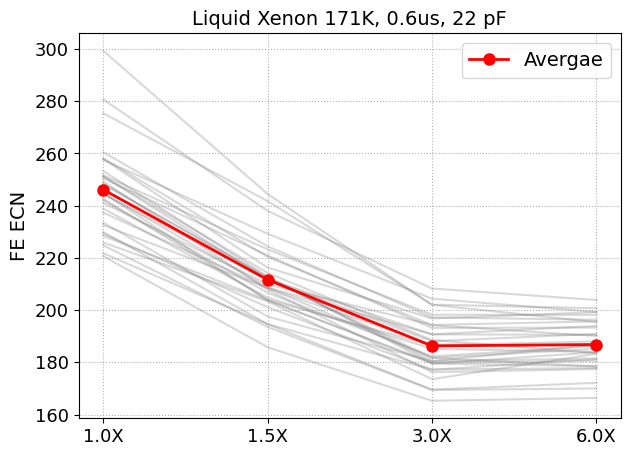

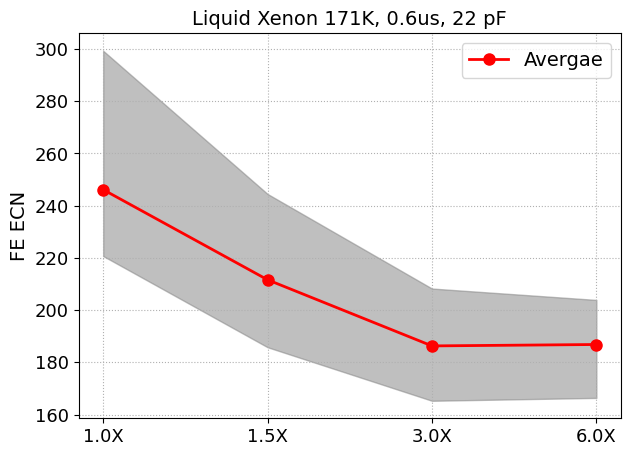

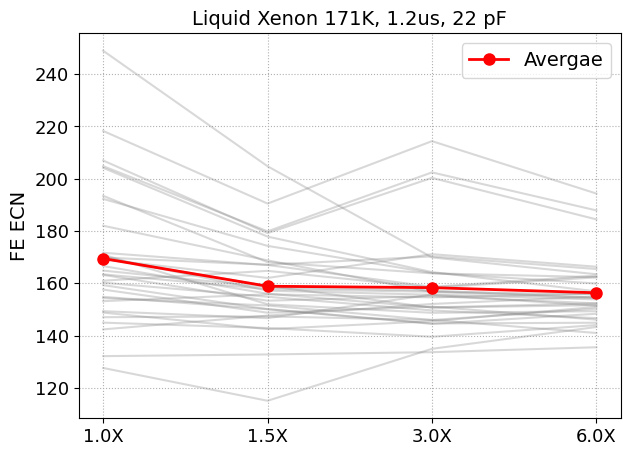

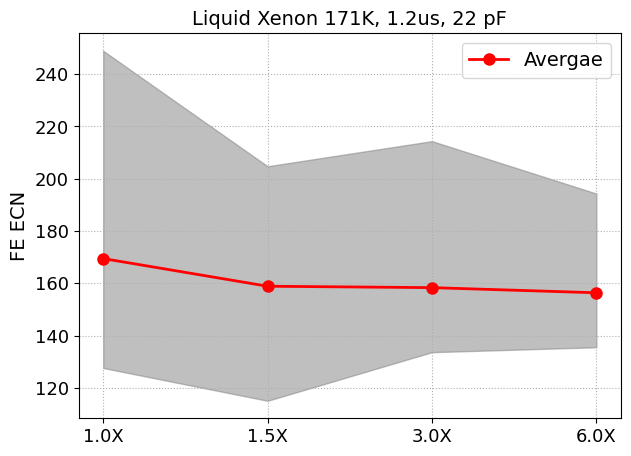

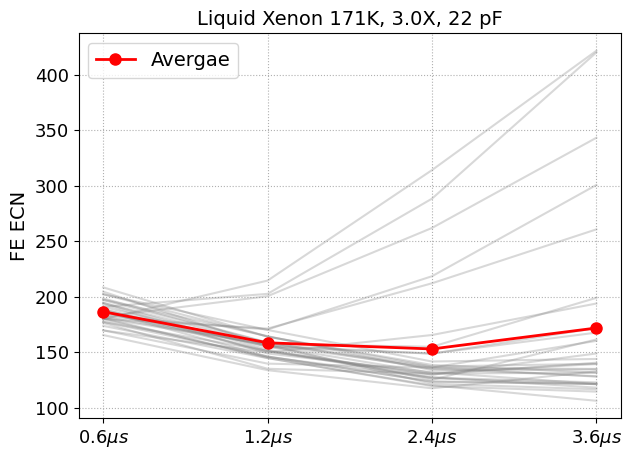

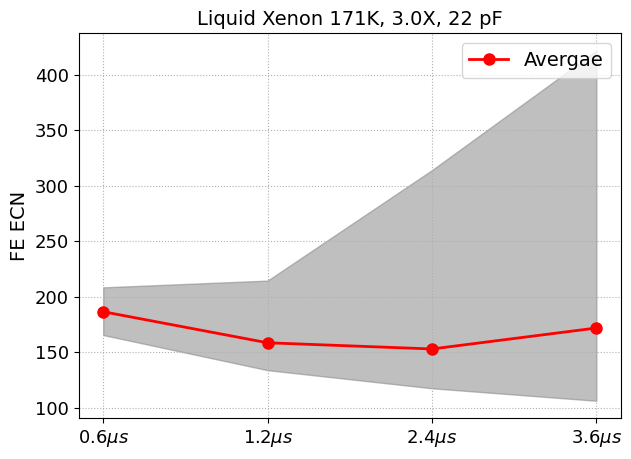

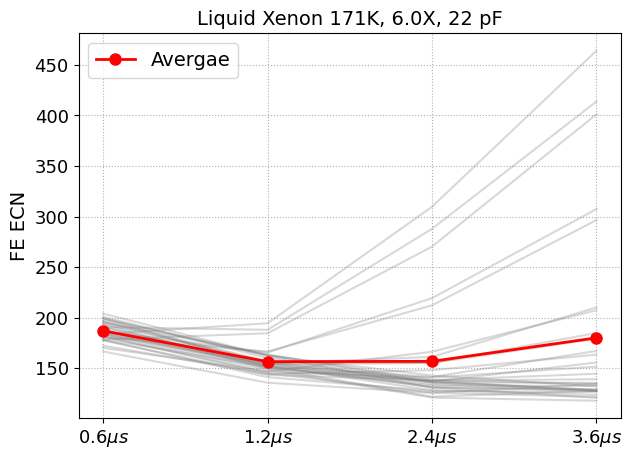

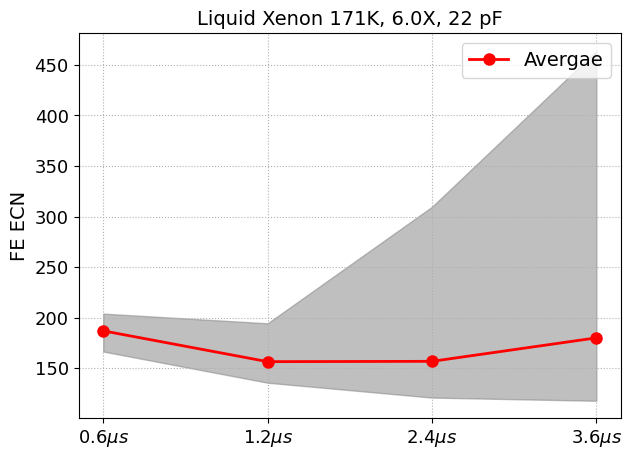

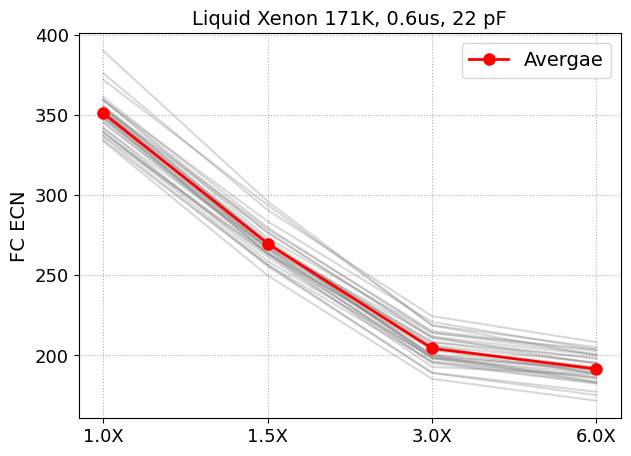

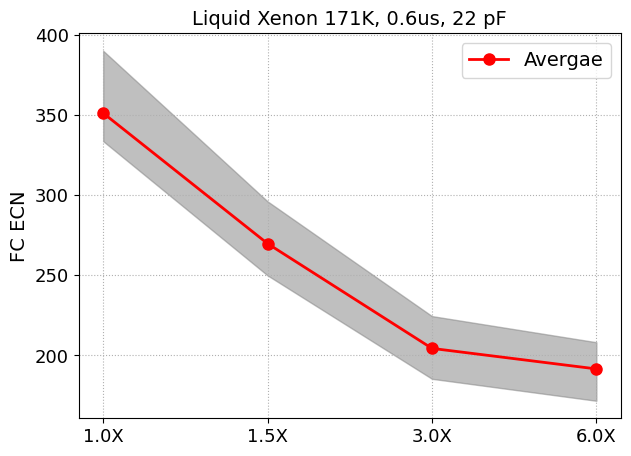

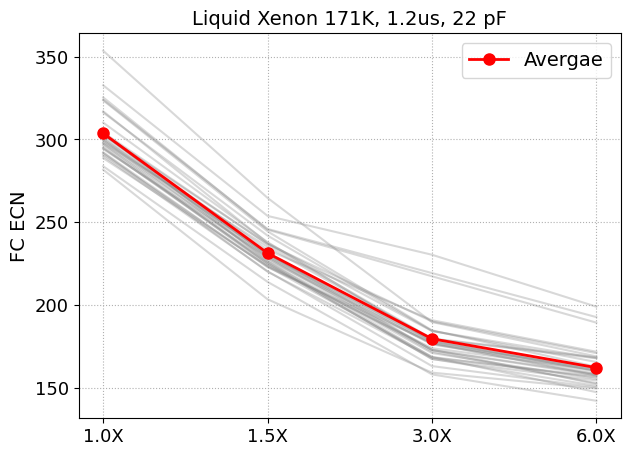

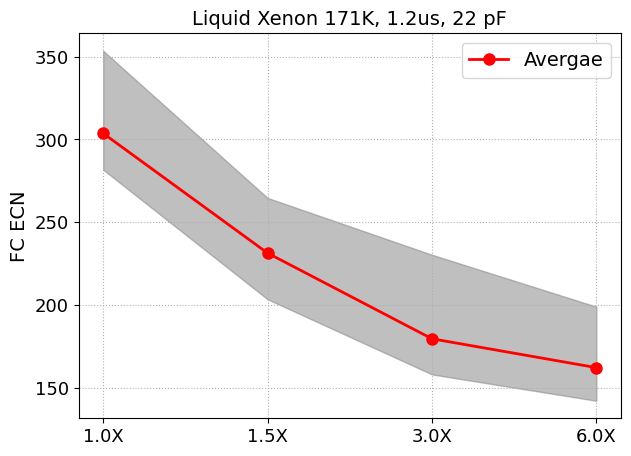

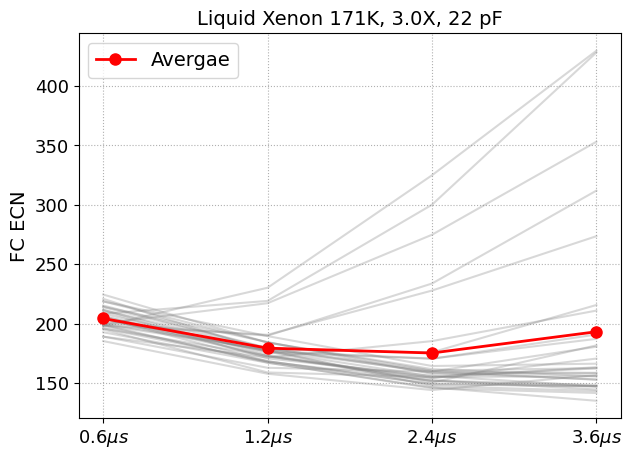

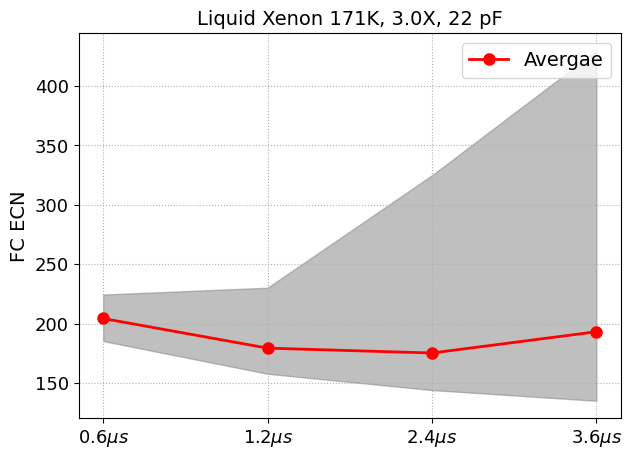

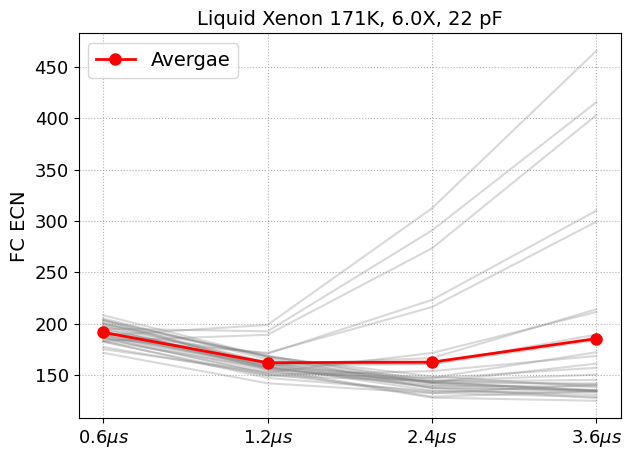

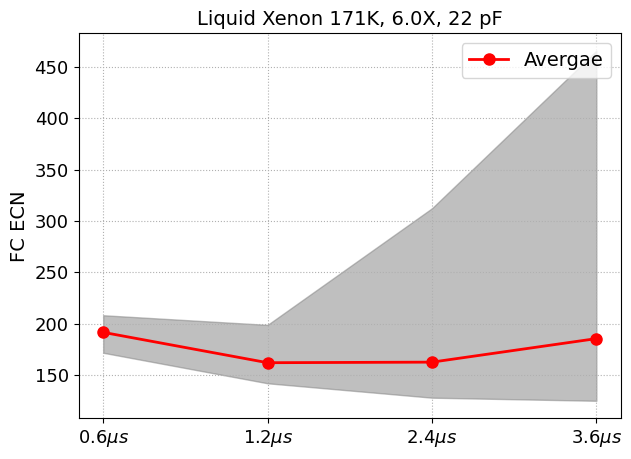

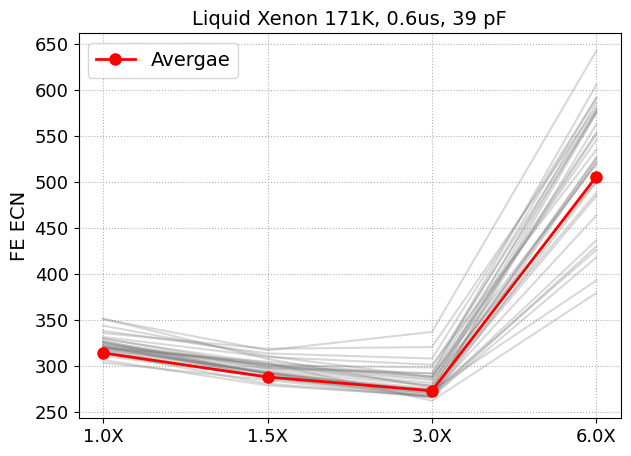

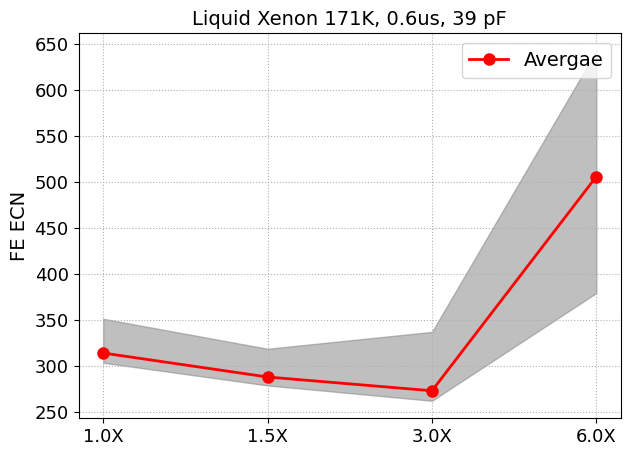

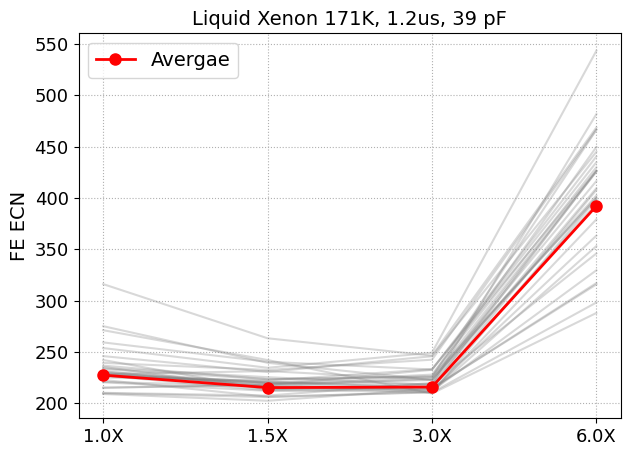

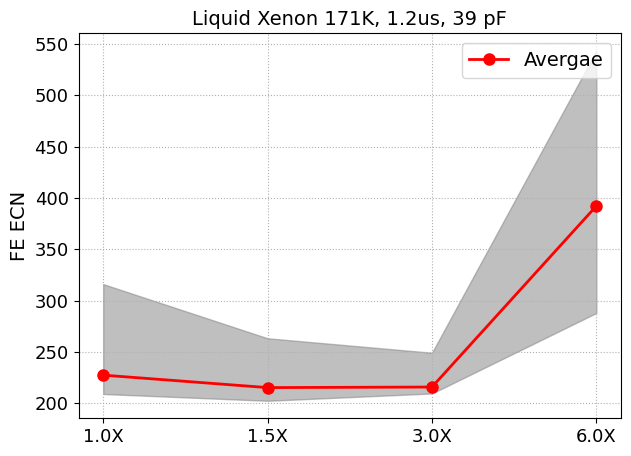

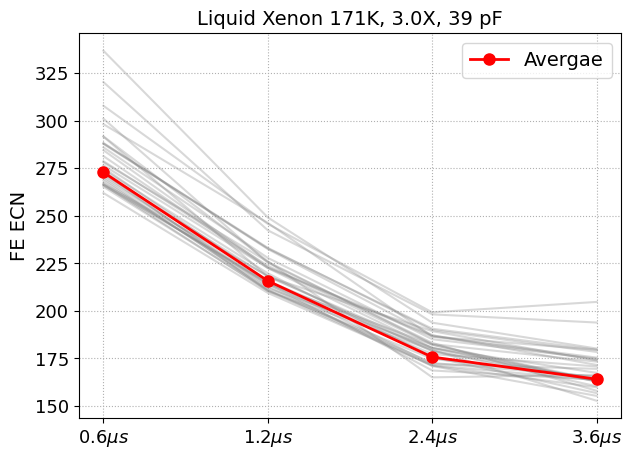

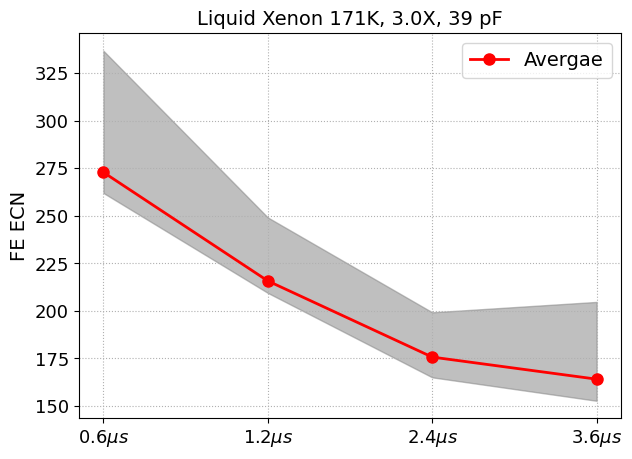

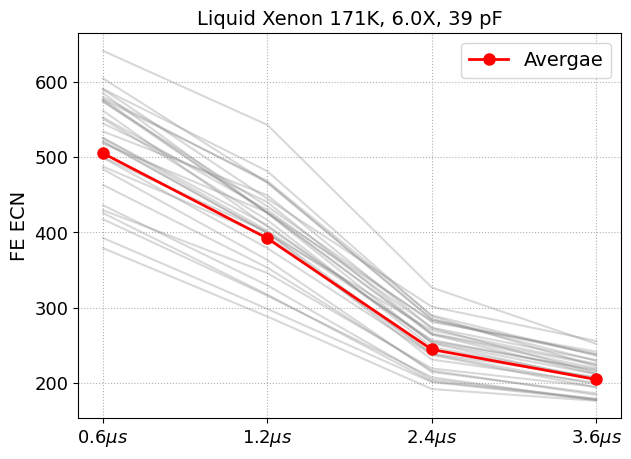

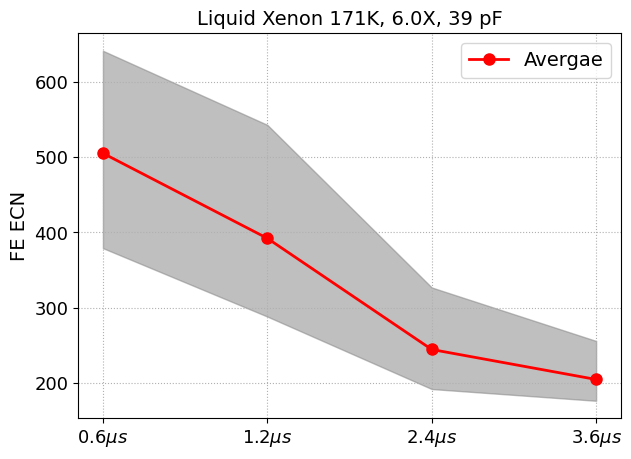

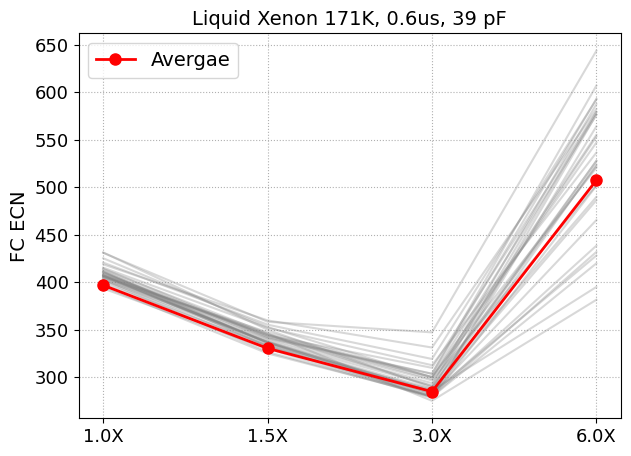

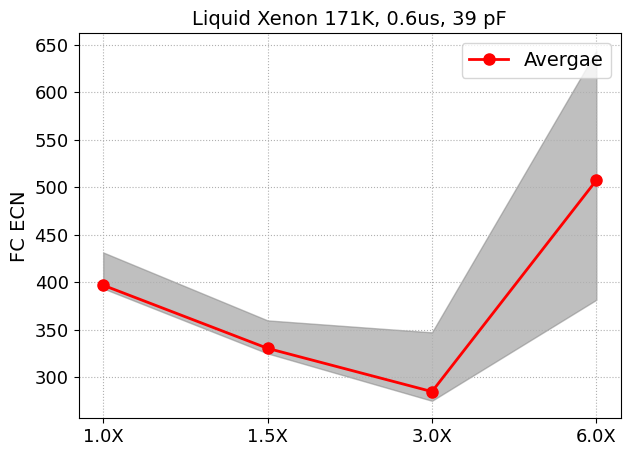

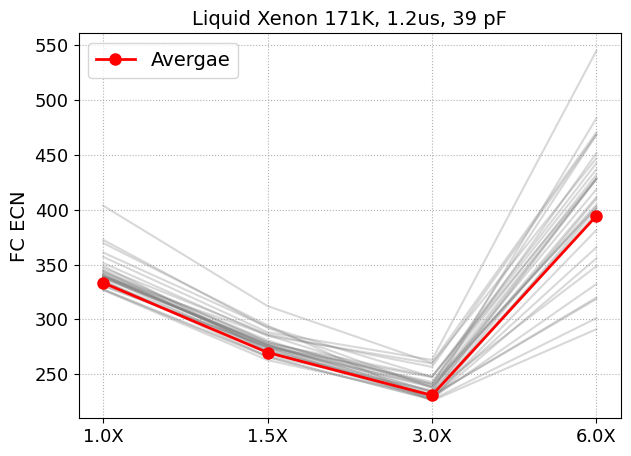

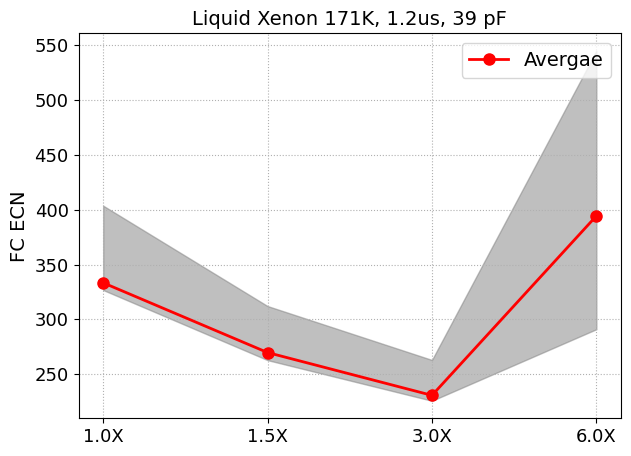

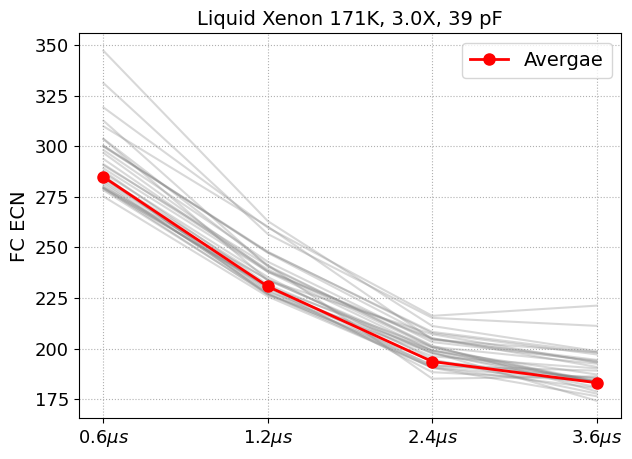

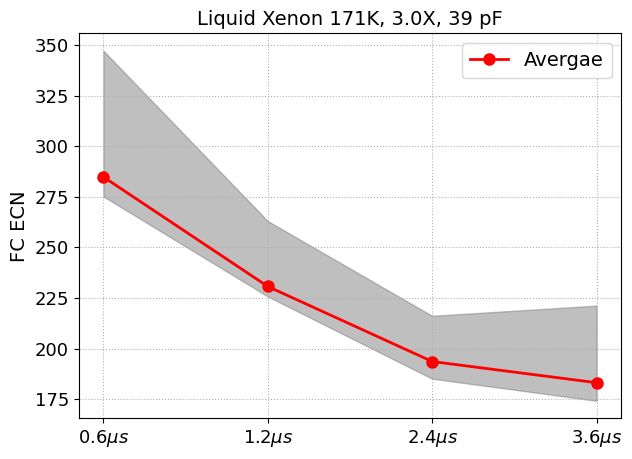

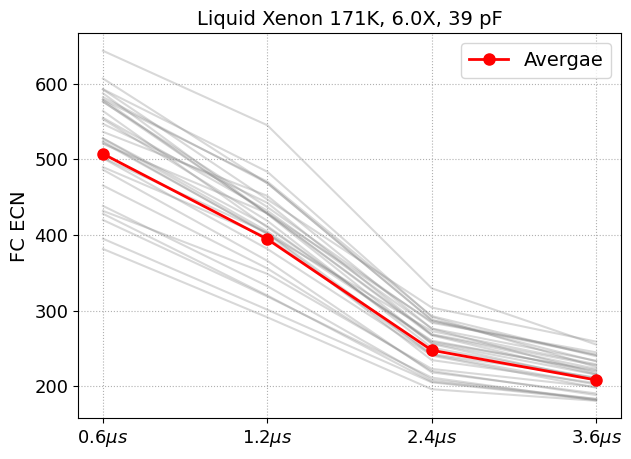

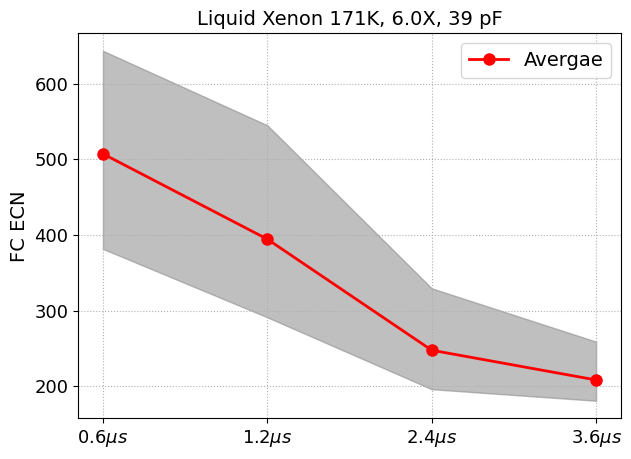

In [17]:
        
condition = 'Liquid Xenon 171K'
path = f'/Users/yumiao/Documents/Works/0nbb/nEXO/ASIC_SLAC/Data/UCSD/Liquid Xenon 171K USB out/noise_csvs/'

bank = 1
fe_flag = True
fix = '1.2us'
fixvar = 'peaking time'

for bank in [0, 1]:
    for fe_flag in [True, False]:
        for fix, fixvar in zip(['0.6us', '1.2us', '3.0X', '6.0X'], ['peaking time', 'peaking time', 'gain', 'gain']):

            fesets = config_dict[fix]
            mark = 'FE' if fe_flag else 'FC'

            fig = ENC_vs_variables(path, condition, bank, fix, fesets, fixvar, fe_flag) ;
            fig.savefig(path + f'../ENC/{mark}_ENC_fixed{fix}_bank{bank}_lines.pdf')

            fig = ENC_vs_variables(path, condition, bank, fix, fesets, fixvar, fe_flag, band=True) ;
            fig.savefig(path + f'../ENC/{mark}_ENC_fixed{fix}_bank{bank}_bands.pdf')

In [47]:
# ENC vs Peaking time / Gains with fixed Gain / Peaking time
import numpy as np
import matplotlib.pyplot as plt
from CryoAsicENC import ENC_calculator

def ENC_vs_variables_FEtoFC_ENCratio(path, condition, bank, feset, feset_nums, fix):
    config = config = {'capacitance_1': 22, 'capacitance_2': 39}
    calc = ENC_calculator(config)
    variables = [r'0.6$\mu s$', r'1.2$\mu s$', r'2.4$\mu s$', r'3.6$\mu s$'] if fix=='gain' else ['1.0X', '1.5X', '3.0X', '6.0X']
    FE_ENC_channels, FC_ENC_channels = [], []
    for feset_num in feset_nums:
        calc.set_FEset(feset_num)
        calc.set_filename(path + f'FE{feset_num}_noise.csv')
        
        calc.load_noise_csv()
        calc.ENC_FE()
        FE_ENC_channels.append(calc.enc_fe)
        calc.ENC_FC()
        FC_ENC_channels.append(calc.enc_fc)
        
    FE_ENC_channels = np.array(FE_ENC_channels)
    FE_ENC_channels = FE_ENC_channels[:, 0+32*bank:32+32*bank]
    mask = ~np.all(FE_ENC_channels == 0, axis=0)
    FE_ENC_channels_masked = FE_ENC_channels[:, mask]

    FC_ENC_channels = np.array(FC_ENC_channels)
    FC_ENC_channels = FC_ENC_channels[:, 0+32*bank:32+32*bank]
    mask = ~np.all(FC_ENC_channels == 0, axis=0)
    FC_ENC_channels_masked = FC_ENC_channels[:, mask]
    
    mean_FE_ENC_channels_masked = np.mean(FE_ENC_channels_masked, axis=1)
    mean_FC_ENC_channels_masked = np.mean(FC_ENC_channels_masked, axis=1)
    
    fig, ax = plt.subplots(1, 2, figsize=(11, 4))
    # Draw different channel as light gray lines
    ax[0].plot(mean_FE_ENC_channels_masked, 'o-', ms=8, lw=2, color='chocolate', label='FE average')
    ax[0].plot(mean_FC_ENC_channels_masked, 'o-', ms=8, lw=2, color='blue',      label='FC average')
    ax[0].set_xticks(np.arange(len(feset_nums)), variables)
    ax[0].set_ylabel('ENC', fontsize=14)
    ax[0].tick_params(axis='both', labelsize=13)
    ax[0].grid(linestyle=':')
    ax[0].legend(prop={'size':14})
    
    print(mean_FC_ENC_channels_masked**2-mean_FE_ENC_channels_masked**2)
    ax[1].plot(mean_FE_ENC_channels_masked**2 / mean_FC_ENC_channels_masked**2, 'o-', ms=8, lw=2, color='green', label='Avergae')
    ax[1].set_xticks(np.arange(len(feset_nums)), variables)
    ax[1].set_ylabel('FE ENC / FC ENC', fontsize=14)
    ax[1].tick_params(axis='both', labelsize=13)
    ax[1].grid(linestyle=':')
    ax[1].legend(prop={'size':14})
    cap = calc.C1 if bank == 0 else calc.C2
    ax[0].set_title(condition + ', ' + feset + f', {cap} pF', fontsize=14)
    
    plt.tight_layout()
    return fig


/Users/yumiao/Documents/Works/0nbb/nEXO/Reconstruction/waveform/cryo-asic-analysis/CryoAsicENC.py:136: RuntimeWarning: invalid value encountered in sqrt
  Vorms_FE = np.where(Vorms_FC > self.adc_vrms, np.sqrt(Vorms_FC**2 - self.adc_vrms**2), 0 )
/Users/yumiao/Documents/Works/0nbb/nEXO/Reconstruction/waveform/cryo-asic-analysis/CryoAsicENC.py:136: RuntimeWarning: invalid value encountered in sqrt
  Vorms_FE = np.where(Vorms_FC > self.adc_vrms, np.sqrt(Vorms_FC**2 - self.adc_vrms**2), 0 )
/Users/yumiao/Documents/Works/0nbb/nEXO/Reconstruction/waveform/cryo-asic-analysis/CryoAsicENC.py:136: RuntimeWarning: invalid value encountered in sqrt
  Vorms_FE = np.where(Vorms_FC > self.adc_vrms, np.sqrt(Vorms_FC**2 - self.adc_vrms**2), 0 )
/Users/yumiao/Documents/Works/0nbb/nEXO/Reconstruction/waveform/cryo-asic-analysis/CryoAsicENC.py:136: RuntimeWarning: invalid value encountered in sqrt
  Vorms_FE = np.where(Vorms_FC > self.adc_vrms, np.sqrt(Vorms_FC**2 - self.adc_vrms**2), 0 )
/Users/yumiao/Do

[63110.59641951 28175.48617037  7114.12848979  1802.6407471 ]
[63563.88496414 28277.05593392  7112.71809724  1791.80509214]
[7114.12848979 7112.71809724 7069.51586073 7070.20830942]
[1802.6407471  1791.80509214 1781.90430157 1771.52527937]
[62878.80327899 28069.65243228  7083.31648044  1893.70367759]
[63494.92175333 28184.66043552  7085.86161937  1840.25175144]


/Users/yumiao/Documents/Works/0nbb/nEXO/Reconstruction/waveform/cryo-asic-analysis/CryoAsicENC.py:136: RuntimeWarning: invalid value encountered in sqrt
  Vorms_FE = np.where(Vorms_FC > self.adc_vrms, np.sqrt(Vorms_FC**2 - self.adc_vrms**2), 0 )
/Users/yumiao/Documents/Works/0nbb/nEXO/Reconstruction/waveform/cryo-asic-analysis/CryoAsicENC.py:136: RuntimeWarning: invalid value encountered in sqrt
  Vorms_FE = np.where(Vorms_FC > self.adc_vrms, np.sqrt(Vorms_FC**2 - self.adc_vrms**2), 0 )


[7083.31648044 7085.86161937 7041.19773529 7035.18829247]
[1893.70367759 1840.25175144 1799.81388966 1778.76550862]


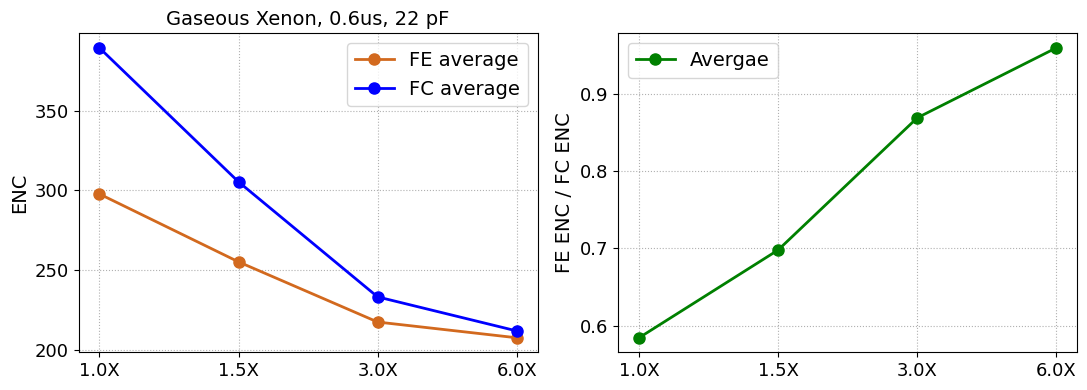

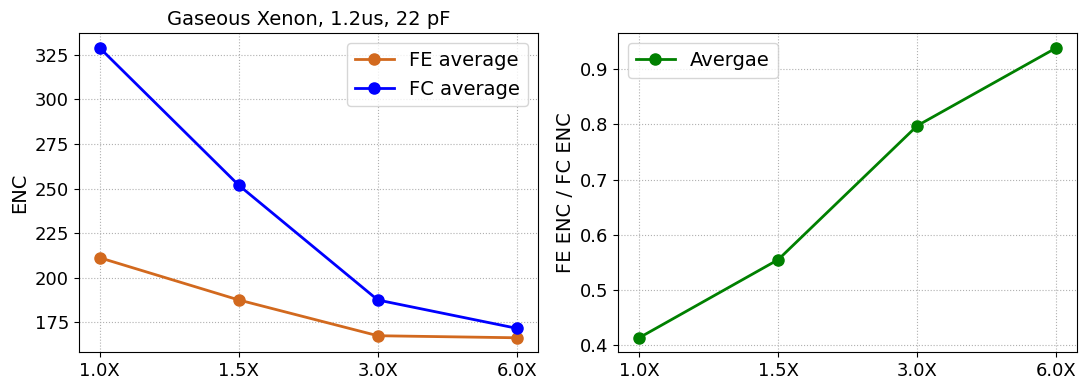

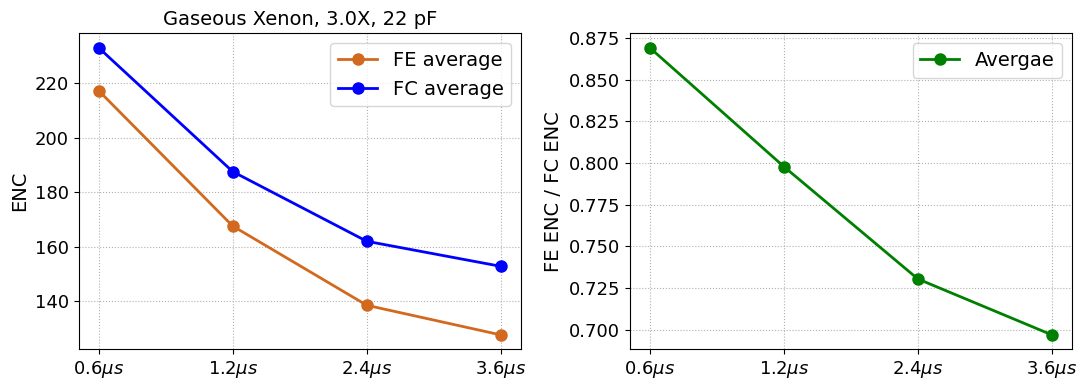

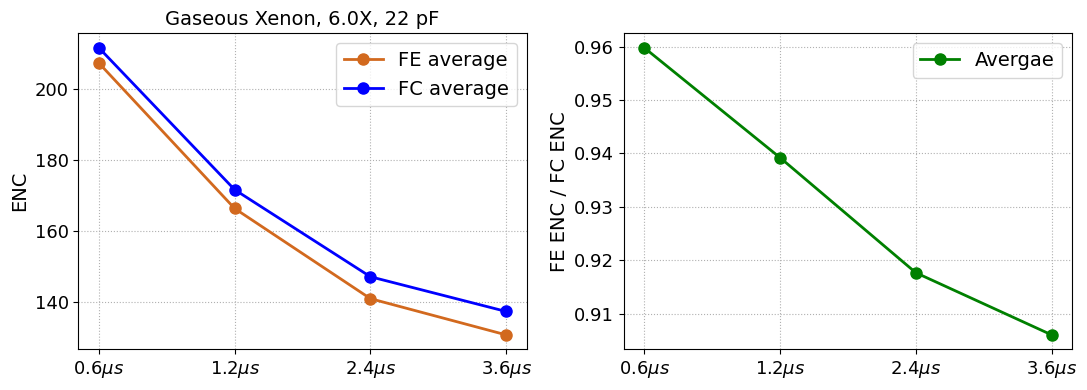

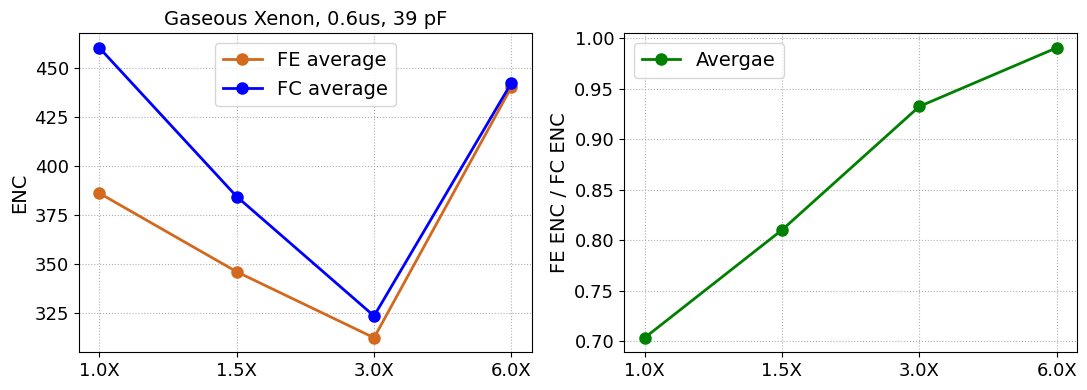

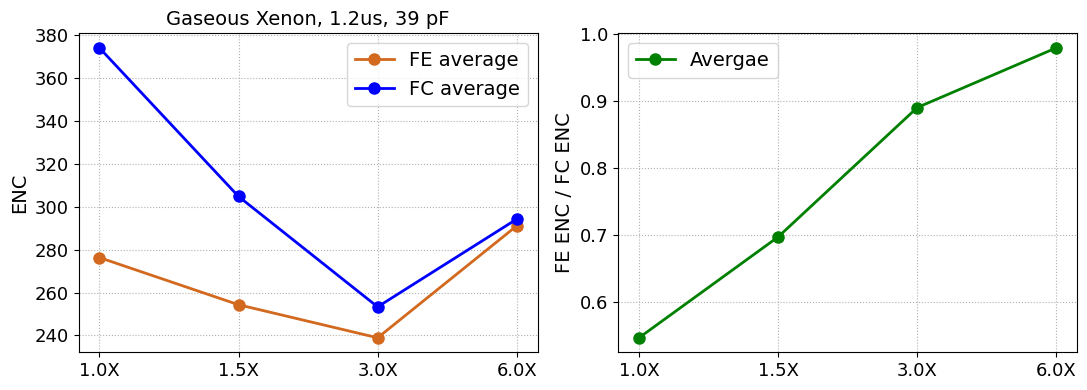

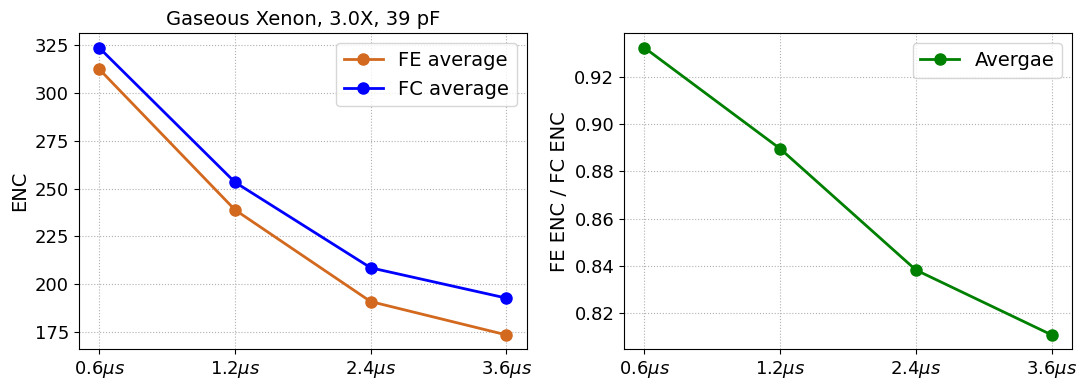

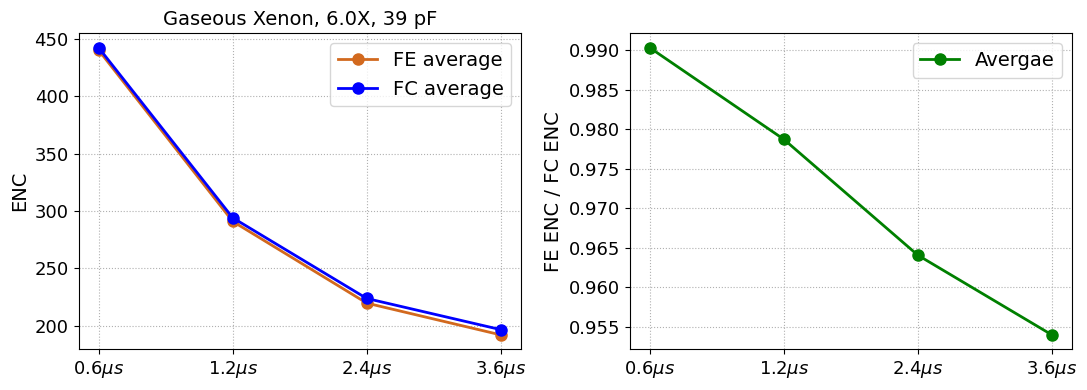

In [48]:
condition = 'Gaseous Xenon'
path = f'/Users/yumiao/Documents/Works/0nbb/nEXO/ASIC_SLAC/Data/UCSD/Gaseous Xenon/noise_csvs/'


for bank in [0, 1]:
    for fix, fixvar in zip(['0.6us', '1.2us', '3.0X', '6.0X'], ['peaking time', 'peaking time', 'gain', 'gain']):

        fesets = config_dict[fix]
        mark = 'FE' if fe_flag else 'FC'

        fig = ENC_vs_variables_FEtoFC_ENCratio(path, condition, bank, fix, fesets, fixvar) ;
        #fig.savefig(path + f'../ENC/ENCratio_fixed{fix}_bank{bank}_lines.pdf')


In [35]:
# plotting channel-wise ENC.
import matplotlib.pyplot as plt
def compare_FEENC_FCENC(enc_fc_list, enc_fe_list, env, feset):
    fig, ax = plt.subplots(1, 2, figsize=(11, 4))
    for enc_fc, enc_fe, lb in zip(enc_fc_list, enc_fe_list, env):
        ax[0].plot(enc_fc, 'o:', lw=1, ms=3, label=lb)
        ax[1].plot(enc_fe, 'd:', lw=1, ms=3, label=lb)
        
    ax[0].set_xlabel('Channel No', fontsize=12)
    ax[0].set_ylabel('ENC', fontsize=12)
    ax[0].grid(True, linestyle=':')
    #ax[0].legend(prop={'size':12})
    ax[0].tick_params(axis='both', labelsize=12)
    ax[0].set_title(f'FC ENC ({feset})', fontsize=13)
    
    ax[1].set_xlabel('Channel No', fontsize=12)
    ax[1].set_ylabel('ENC', fontsize=12)
    ax[1].grid(True, linestyle=':')
    #ax[1].legend(prop={'size':12})
    ax[1].tick_params(axis='both', labelsize=12)
    ax[1].set_title(f'FE ENC ({feset})', fontsize=13)
    
    plt.tight_layout()
    return fig

# Plot ENC with different FE setting
import matplotlib.pyplot as plt
import numpy as np
def compare_ENC_differentFEset(enc_list1, enc_list2, variable='time', fix='', env=''):
    fig, ax = plt.subplots(1, 2, figsize=(11, 5))
    for cha in range(32):
        enc_one_channel = []
        for enc in enc_list1:
            enc_one_channel.append(enc[cha])
        ax[0].plot(enc_one_channel, 'o-', lw=1, ms=4, label=f'channel {cha}')
    
        enc_one_channel = []
        for enc in enc_list2:
            enc_one_channel.append(enc[cha])
        ax[1].plot(enc_one_channel, 'o-', lw=1, ms=4, label=f'channel {32+cha}')

    y_max = np.max(enc_list1)
    if y_max < np.max(enc_list2):
        y_max = np.max(enc_list2)

    if variable == 'time':
        ax[0].set_xticks(range(4), [r'0.6 $\mu$s', r'1.2 $\mu$s', r'2.4 $\mu$s', r'3.6 $\mu$s'])
    elif variable == 'gain':
        ax[0].set_xticks(range(4), ['1.0X', '1.5X', '3.0X', '6.0X'])
    ax[0].set_ylabel('ENC', fontsize=12)
    ax[0].tick_params(axis='both', labelsize=13)
    ax[0].legend(ncol=4, prop={'size':6})
    ax[0].set_ylim(0, y_max+50)
    ax[0].grid(True, linestyle=':')
        
    if variable == 'time':
        ax[1].set_xticks(range(4), [r'0.6 $\mu$s', r'1.2 $\mu$s', r'2.4 $\mu$s', r'3.6 $\mu$s'])
    elif variable == 'gain':
        ax[1].set_xticks(range(4), ['1.0X', '1.5X', '3.0X', '6.0X'])
    ax[1].set_ylabel('ENC', fontsize=12)
    ax[1].tick_params(axis='both', labelsize=13)
    ax[1].legend(ncol=4, prop={'size':6}, loc='best')
    ax[1].set_ylim(0, y_max+50)
    ax[1].grid(True, linestyle=':')

    fig.text(0.3, 0.98, f'{env} ColdBoard data from UCSD ({fix})' , fontsize=13)
        
    plt.tight_layout()
    return fig
    

/Users/yumiao/Documents/Works/0nbb/nEXO/Reconstruction/waveform/cryo-asic-analysis/CryoAsicENC.py:153: RuntimeWarning: invalid value encountered in sqrt
  Vorms_FE = np.where(Vorms_FC > self.adc_vrms, np.sqrt(Vorms_FC**2 - self.adc_vrms**2), 0 )
/Users/yumiao/Documents/Works/0nbb/nEXO/Reconstruction/waveform/cryo-asic-analysis/CryoAsicENC.py:153: RuntimeWarning: invalid value encountered in sqrt
  Vorms_FE = np.where(Vorms_FC > self.adc_vrms, np.sqrt(Vorms_FC**2 - self.adc_vrms**2), 0 )
/Users/yumiao/Documents/Works/0nbb/nEXO/Reconstruction/waveform/cryo-asic-analysis/CryoAsicENC.py:153: RuntimeWarning: invalid value encountered in sqrt
  Vorms_FE = np.where(Vorms_FC > self.adc_vrms, np.sqrt(Vorms_FC**2 - self.adc_vrms**2), 0 )
/Users/yumiao/Documents/Works/0nbb/nEXO/Reconstruction/waveform/cryo-asic-analysis/CryoAsicENC.py:153: RuntimeWarning: invalid value encountered in sqrt
  Vorms_FE = np.where(Vorms_FC > self.adc_vrms, np.sqrt(Vorms_FC**2 - self.adc_vrms**2), 0 )


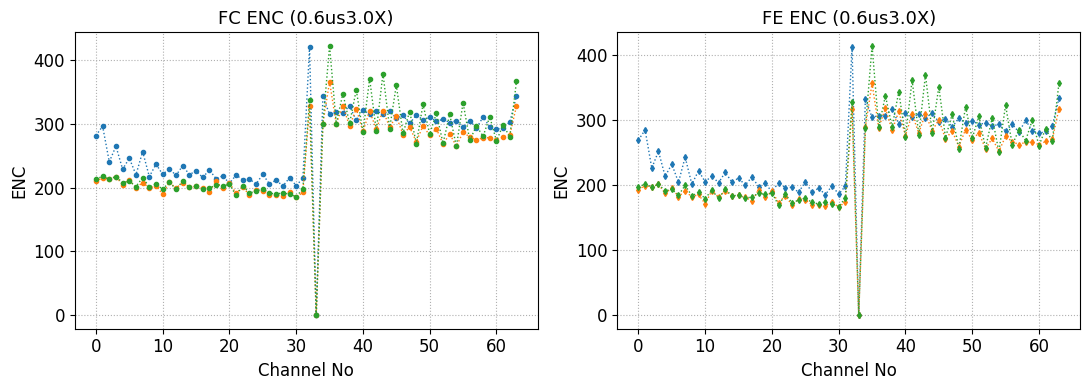

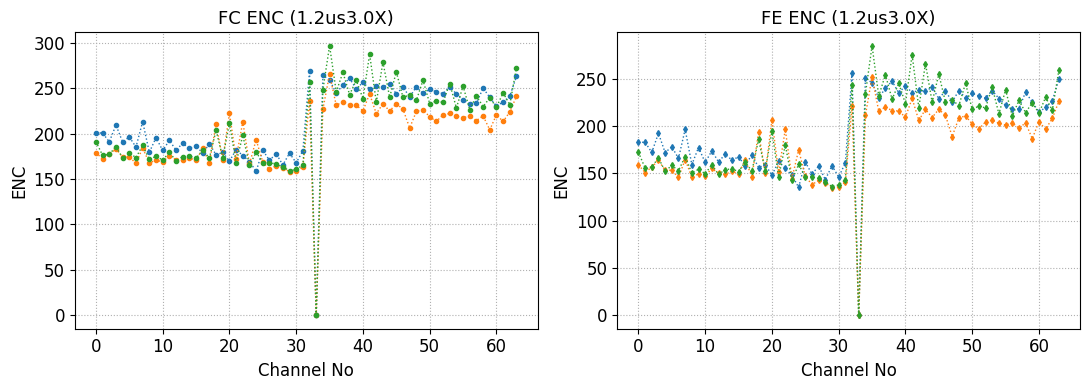

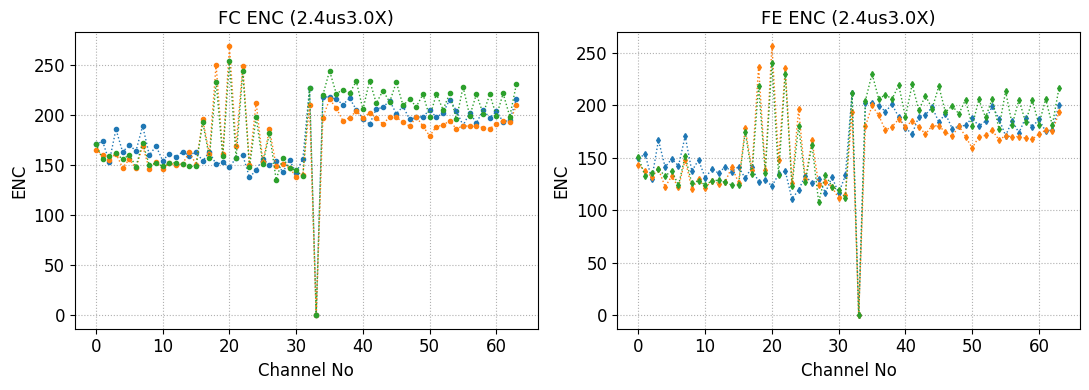

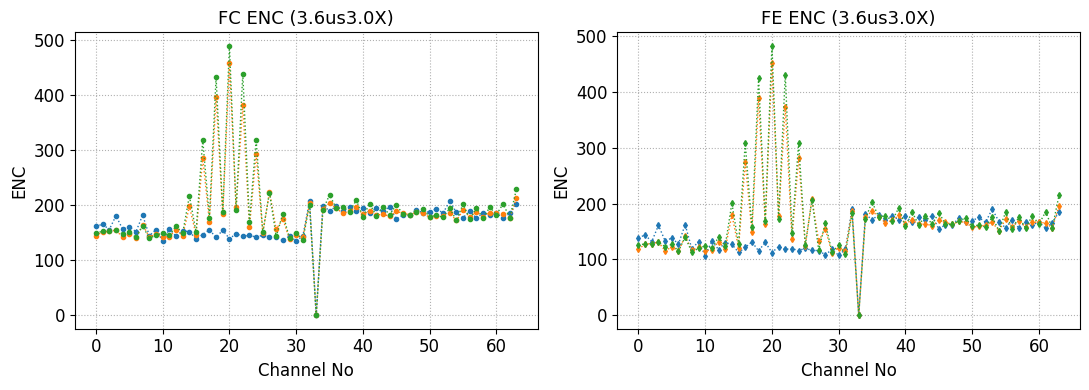

In [27]:
import numpy as np

prefix_path = '/Users/yumiao/Documents/Works/0nbb/nEXO/ASIC_SLAC/Data/UCSD/'
paths = ['Gaseous Xenon', 'Liquid Xenon 169.5K Non-Equilibrium', 'Liquid Xenon 169.5K Equilibrium']
#paths = ['Gaseous Xenon', 'Liquid Xenon 171K USB Out']
#paths = ['Gaseous Xenon', 'Liquid Xenon 171K USB Out', 'Liquid Xenon 171K USB In']

condition = '6_0X'

setnos = config_dict[condition]
for setno in setnos:
    fc_enc_list, fe_enc_list = [], []
    setno = str(setno)
    feset = calc.FEset_dict[setno]
    for rel_path in paths:
        calc.set_FEset(setno)
        calc.set_filename(prefix_path + rel_path + f'/noise_csvs/FE{setno}_noise.csv')
        calc.load_noise_csv()

        calc.ENC_FC()
        calc.ENC_FE()

        fc_enc, fe_enc = calc.enc_fc, calc.enc_fe

        fc_enc_list.append(fc_enc)
        fe_enc_list.append(fe_enc)

    fig = compare_FEENC_FCENC(fc_enc_list, fe_enc_list, paths, feset)
    fig.savefig(prefix_path + rel_path + f'FE{setno}_ENC.pdf')
        

0it [00:00, ?it/s]

/Users/yumiao/Documents/Works/0nbb/nEXO/Reconstruction/waveform/cryo-asic-analysis/CryoAsicENC.py:153: RuntimeWarning: invalid value encountered in sqrt
  Vorms_FE = np.where(Vorms_FC > self.adc_vrms, np.sqrt(Vorms_FC**2 - self.adc_vrms**2), 0 )
/Users/yumiao/Documents/Works/0nbb/nEXO/Reconstruction/waveform/cryo-asic-analysis/CryoAsicENC.py:153: RuntimeWarning: invalid value encountered in sqrt
  Vorms_FE = np.where(Vorms_FC > self.adc_vrms, np.sqrt(Vorms_FC**2 - self.adc_vrms**2), 0 )
/Users/yumiao/Documents/Works/0nbb/nEXO/Reconstruction/waveform/cryo-asic-analysis/CryoAsicENC.py:153: RuntimeWarning: invalid value encountered in sqrt
  Vorms_FE = np.where(Vorms_FC > self.adc_vrms, np.sqrt(Vorms_FC**2 - self.adc_vrms**2), 0 )
/Users/yumiao/Documents/Works/0nbb/nEXO/Reconstruction/waveform/cryo-asic-analysis/CryoAsicENC.py:153: RuntimeWarning: invalid value encountered in sqrt
  Vorms_FE = np.where(Vorms_FC > self.adc_vrms, np.sqrt(Vorms_FC**2 - self.adc_vrms**2), 0 )
/Users/yumiao/Do

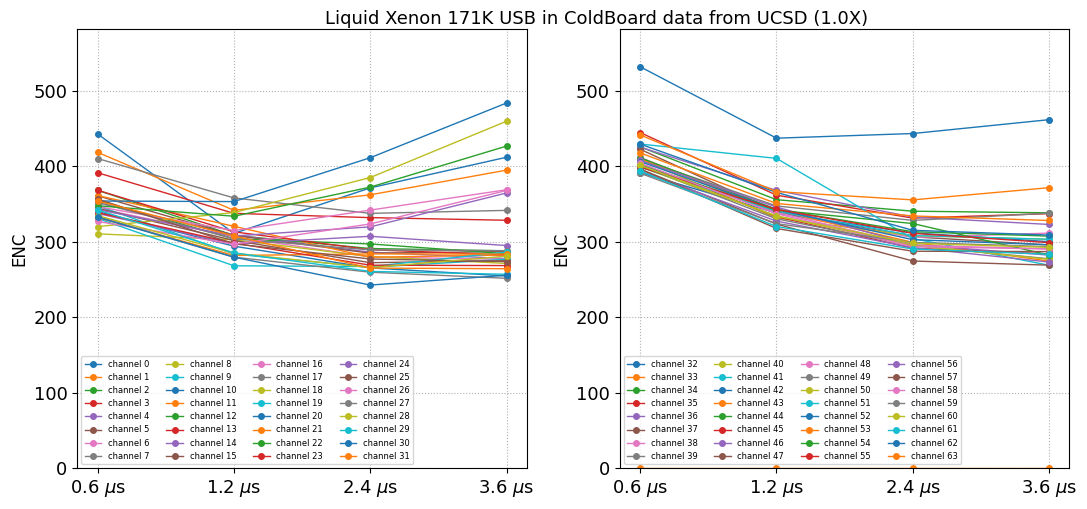

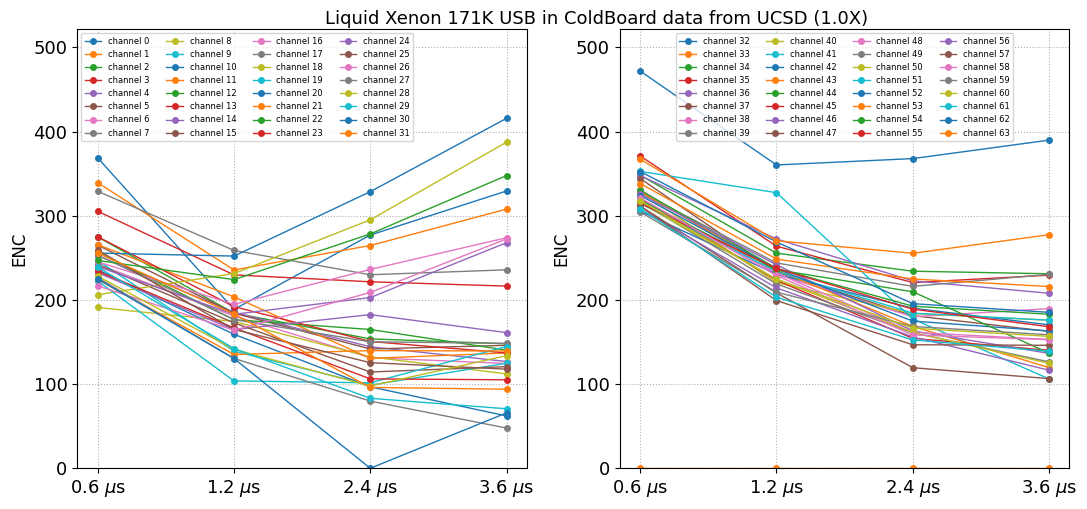

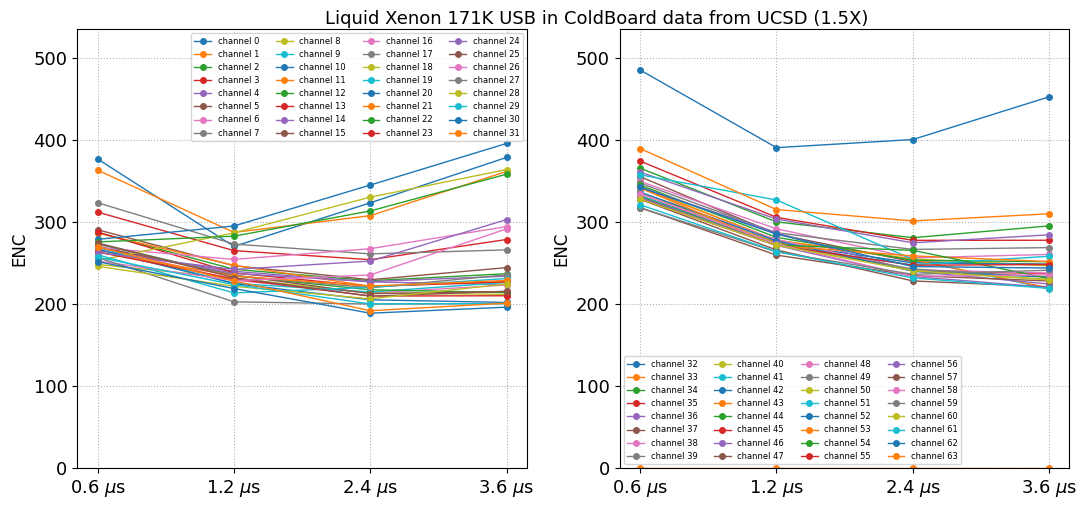

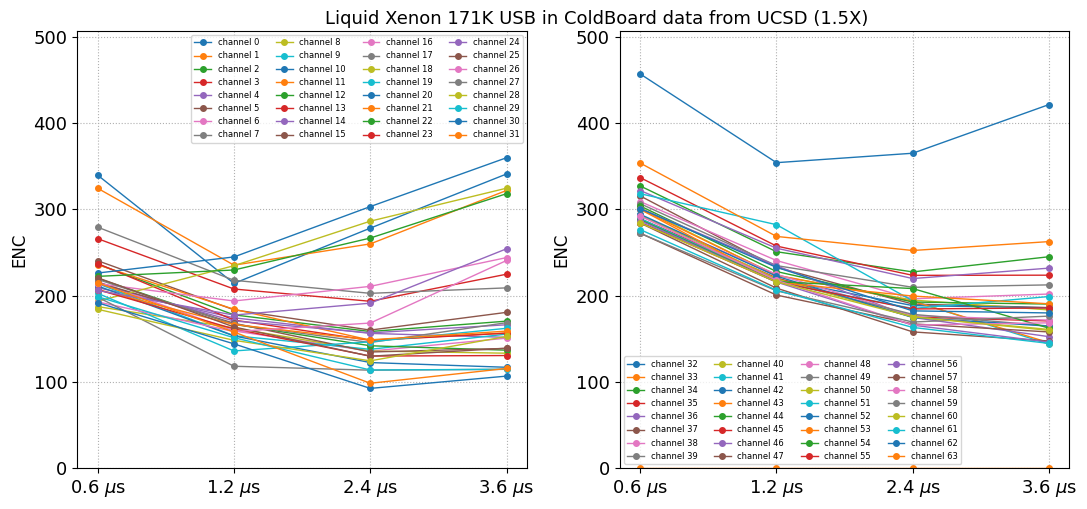

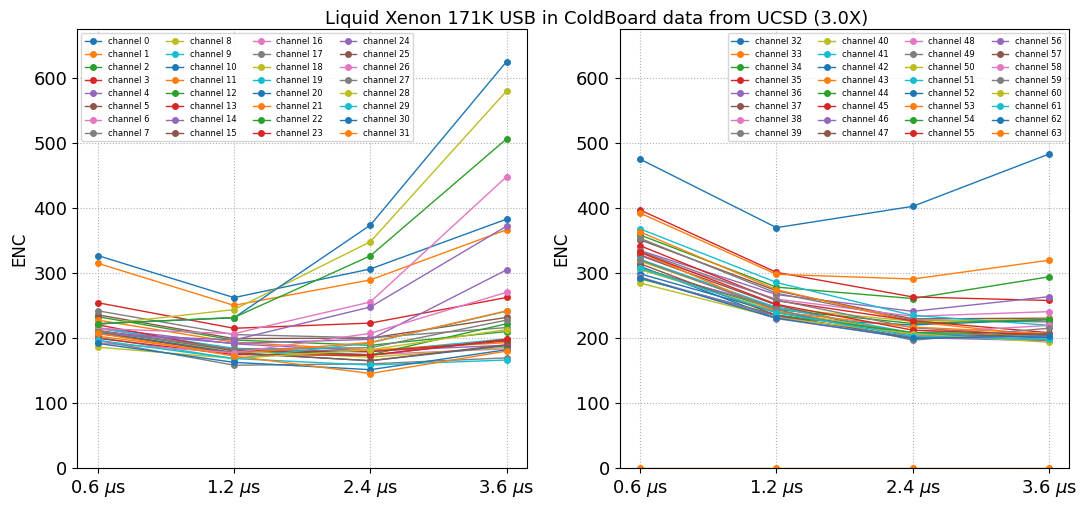

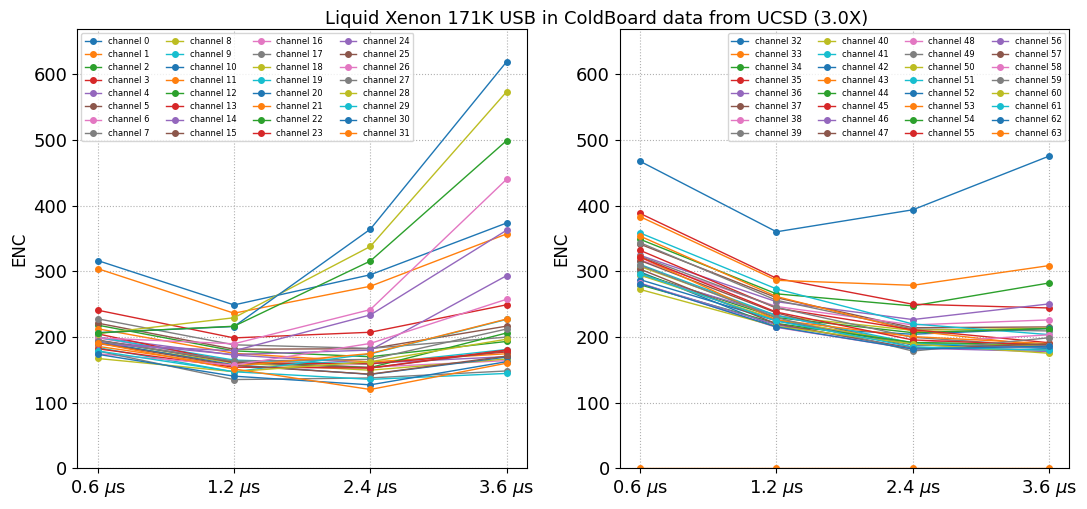

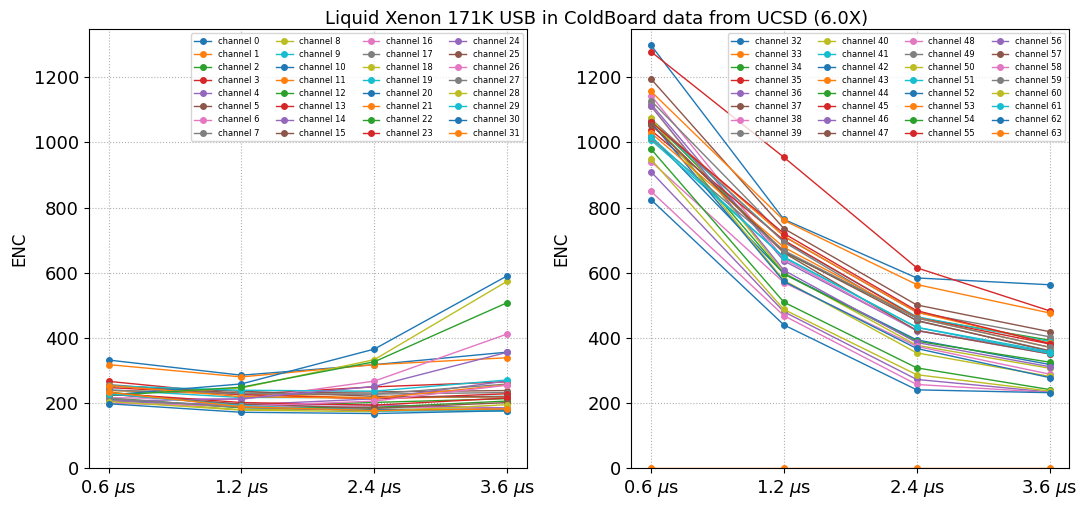

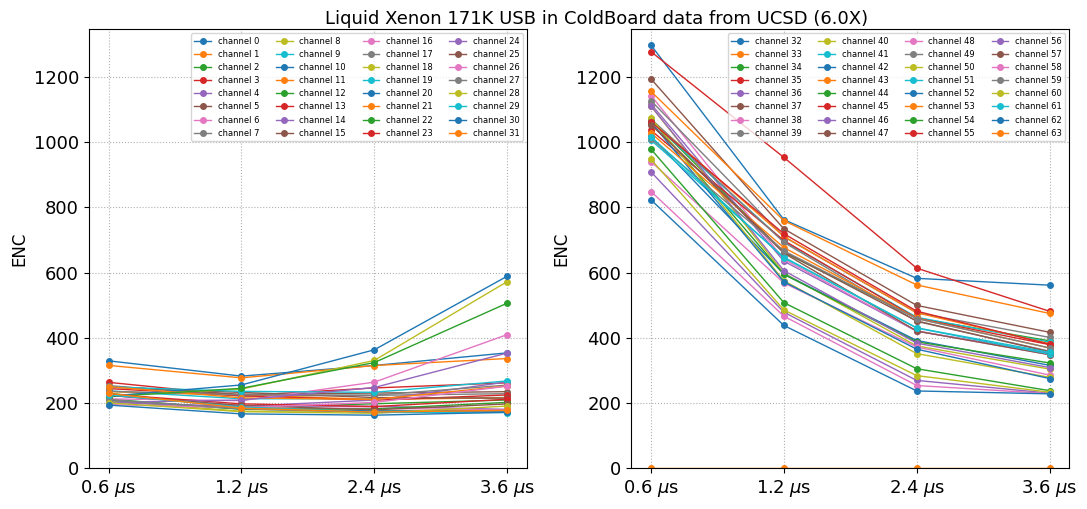

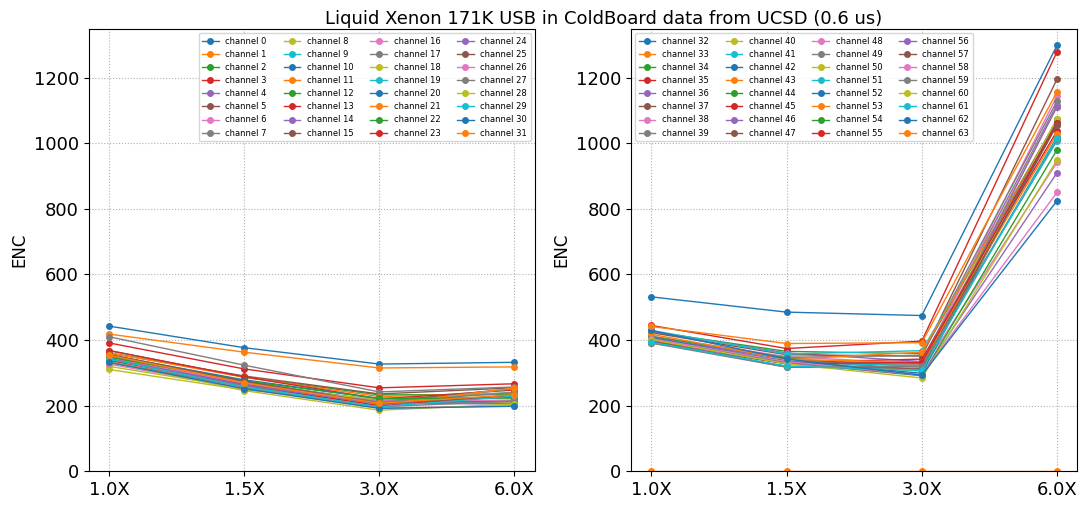

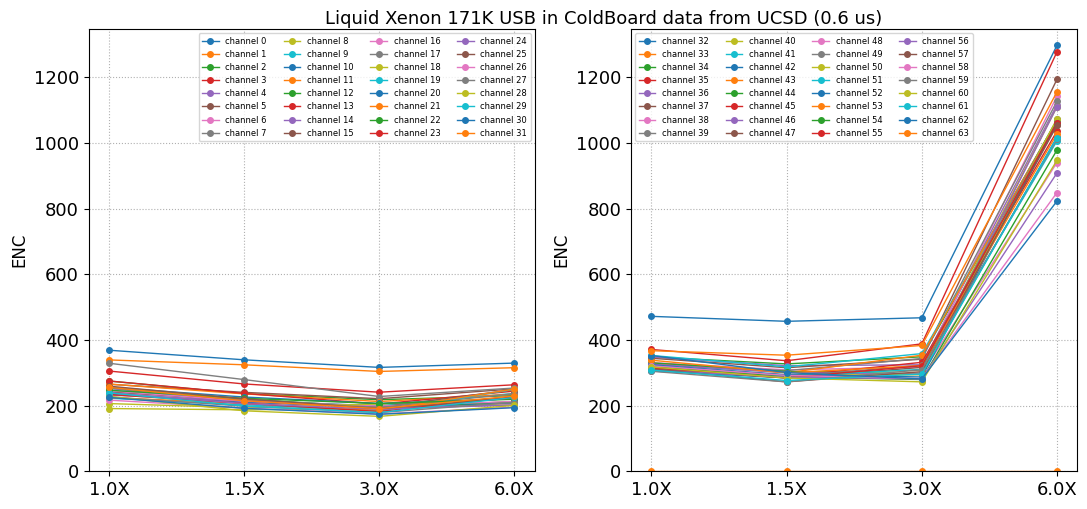

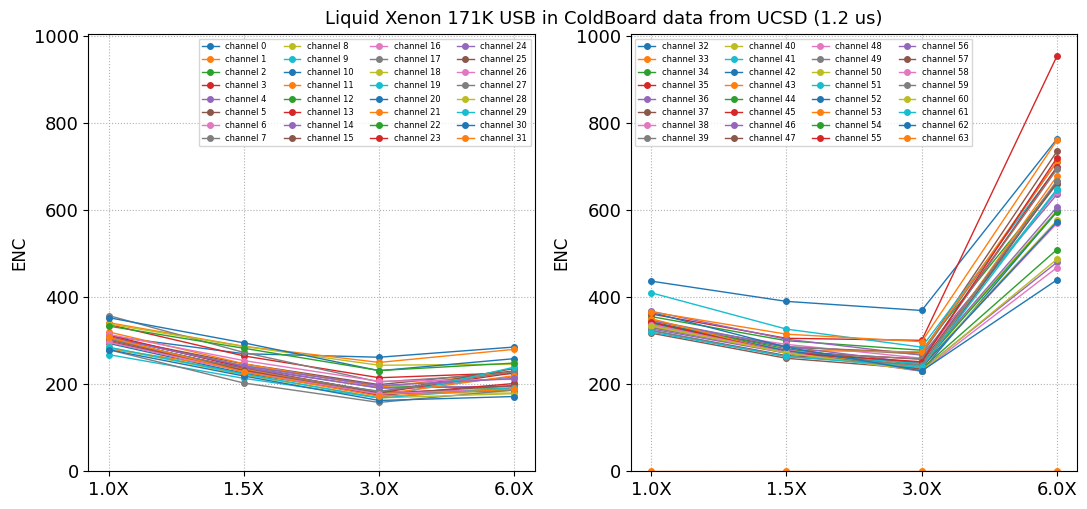

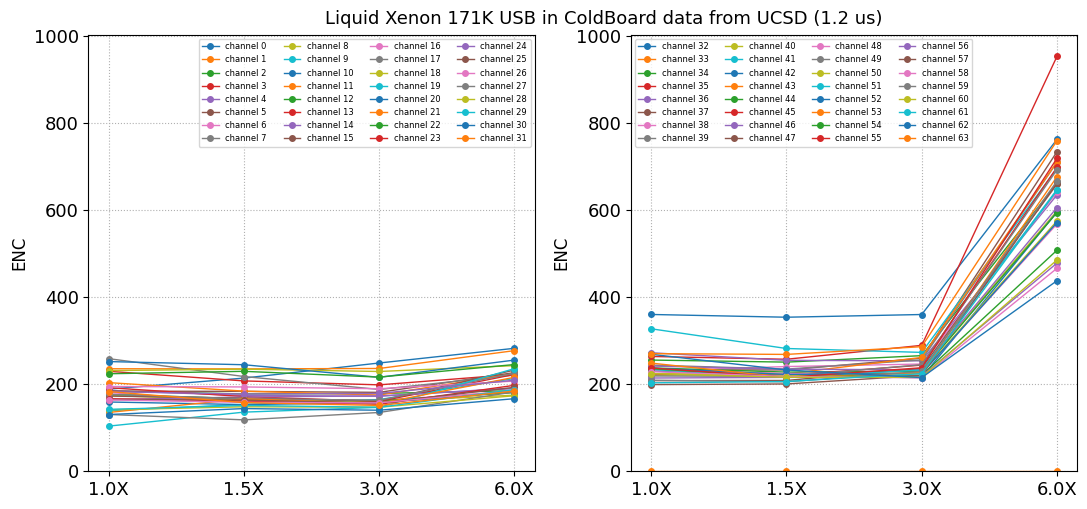

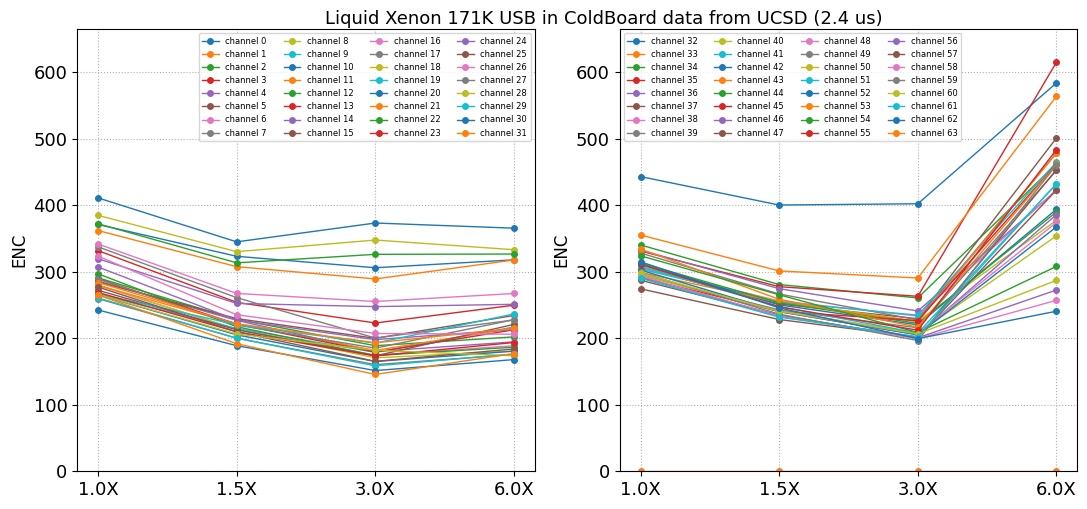

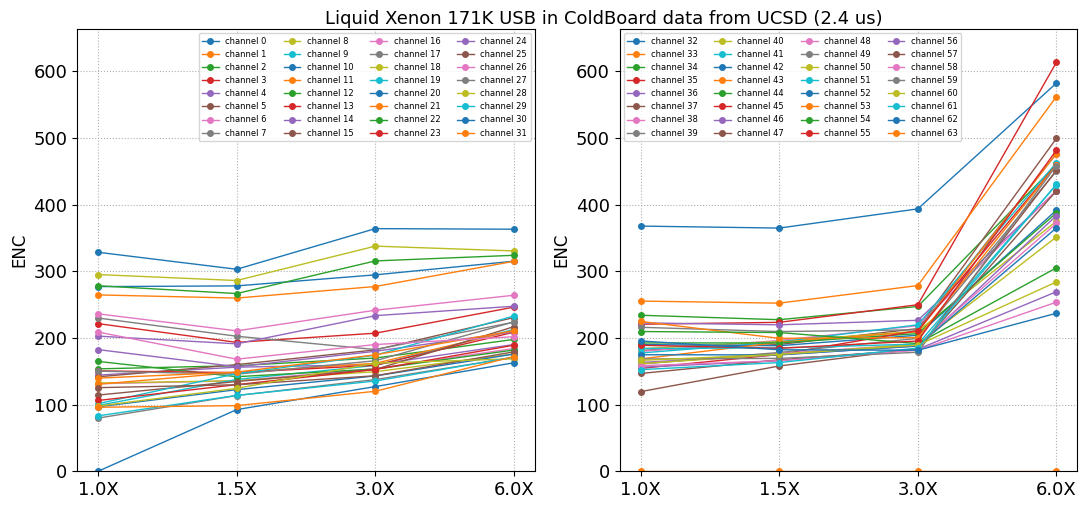

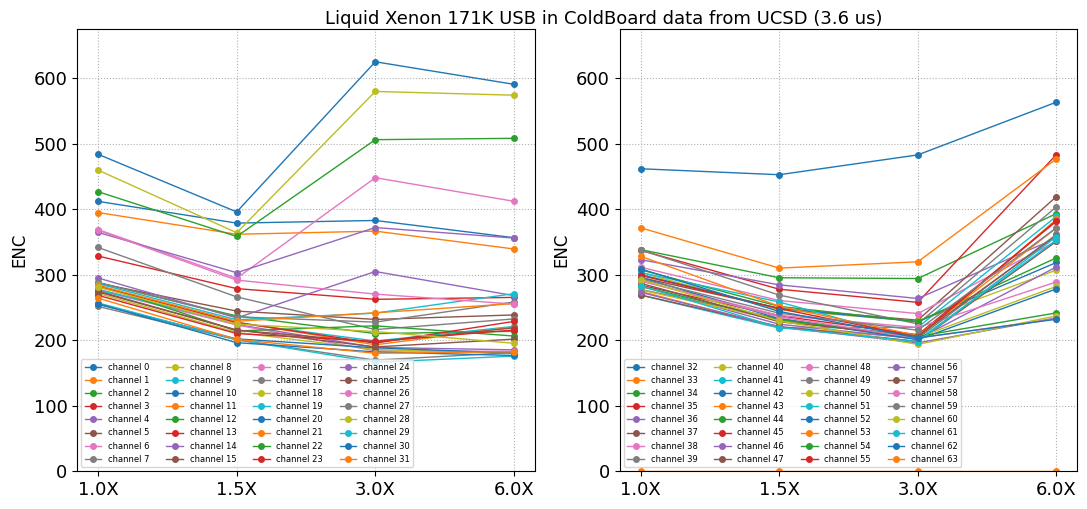

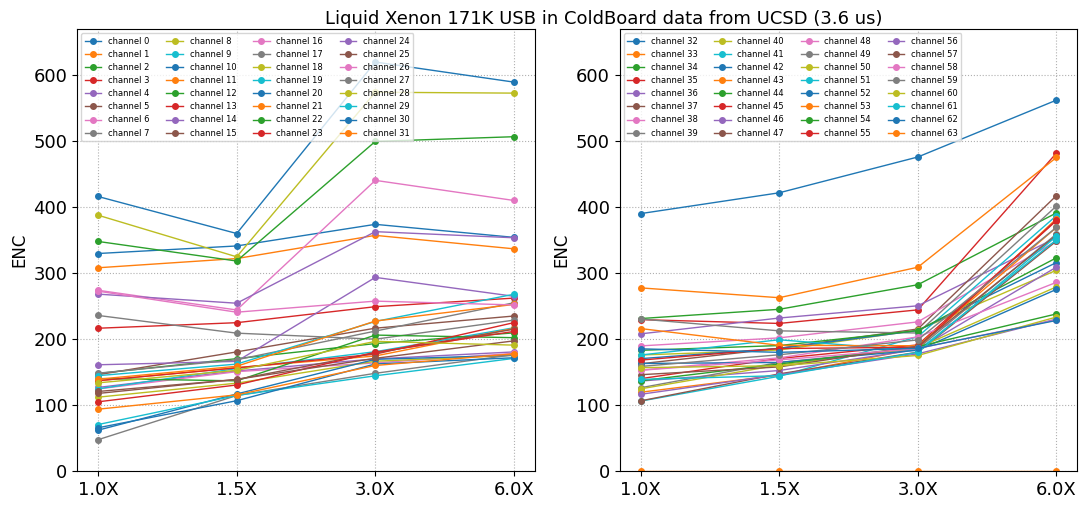

In [29]:
# Calculate ENC with different FE set, separate 0-32 and 32-64 channels.
from tqdm.notebook import tqdm
import numpy as np
prefix_path = '/Users/yumiao/Documents/Works/0nbb/nEXO/ASIC_SLAC/Data/UCSD/'
rel_path = 'Liquid Xenon 171K USB in'
#rel_path = 'Liquid Xenon 169.5K Non-Equilibrium'
#rel_path = 'Gaseous Xenon'

variables = ['time', 'time', 'time', 'time', 'gain', 'gain', 'gain', 'gain']
fixs = ['1.0X', '1.5X', '3.0X', '6.0X', r'0.6 us', r'1.2 us', r'2.4 us', r'3.6 us']

for conf, var, fix in tqdm(zip(config_dict.values(), variables, fixs)):

    FC_ENC_list_1, FE_ENC_list_1 = [], []
    FC_ENC_list_2, FE_ENC_list_2 = [], []

    for setno in conf: # Fix 3.6 mu_s peaking time

        calc.set_FEset(setno)
        #calc.set_filename(f'../../../ASIC_SLAC/Data/UCSD/Gaseous Xenon/noise_csvs/FE{setno}_noise.csv')
        calc.set_filename(prefix_path+f'{rel_path}/noise_csvs/FE{setno}_noise.csv')
        calc.load_noise_csv()

        calc.ENC_FC()
        calc.ENC_FE()

        fc_enc, fe_enc = calc.enc_fc, calc.enc_fe

        FC_ENC_list_1.append(fc_enc[0:32])
        FC_ENC_list_2.append(fc_enc[32:64])
        FE_ENC_list_1.append(fe_enc[0:32])
        FE_ENC_list_2.append(fe_enc[32:64])

    FC_ENC_list_1 = np.array(FC_ENC_list_1)
    FC_ENC_list_2 = np.array(FC_ENC_list_2)
    
    # generate FC ENC comparison plots:
    fig = compare_ENC_differentFEset(FC_ENC_list_1, FC_ENC_list_2, variable=var, fix=fix, env=rel_path)
    fig.savefig(prefix_path+f'{rel_path}/ENC/FC_ENC_{fix}.pdf')
    
    # generate FE ENC comparison plots:
    fig = compare_ENC_differentFEset(FE_ENC_list_1, FE_ENC_list_2, variable=var, fix=fix, env=rel_path)
    fig.savefig(prefix_path+f'{rel_path}/ENC/FE_ENC_{fix}.pdf')
    

/Users/yumiao/Documents/Works/0nbb/nEXO/Reconstruction/waveform/cryo-asic-analysis/CryoAsicENC.py:136: RuntimeWarning: invalid value encountered in sqrt
  Vorms_FE = np.where(Vorms_FC > self.adc_vrms, np.sqrt(Vorms_FC**2 - self.adc_vrms**2), 0 )


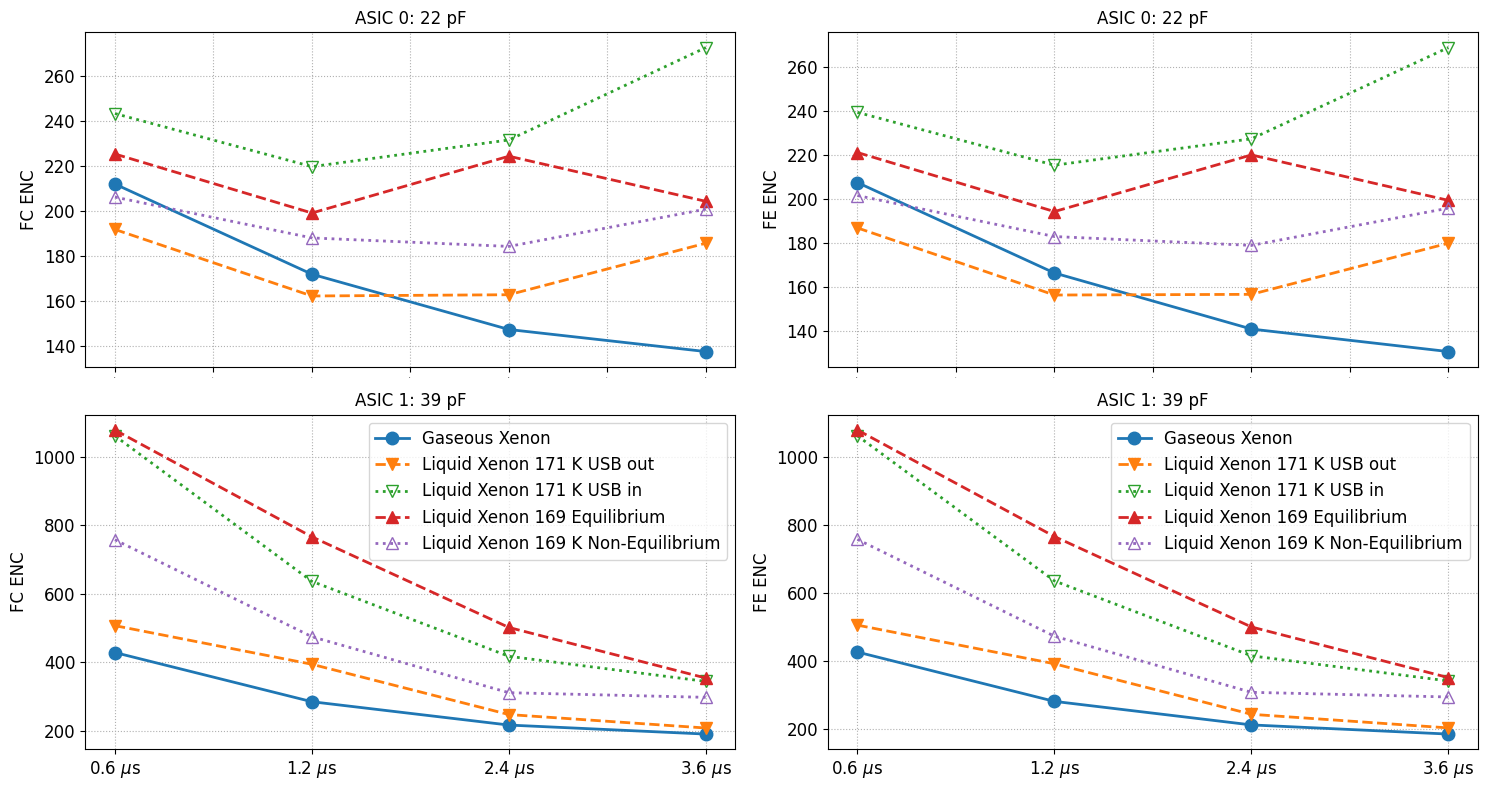

In [7]:
# compare average noise 
# Calculate ENC with different FE set, separate 0-32 and 32-64 channels.
import numpy as np

prefix_path = '/Users/yumiao/Documents/Works/0nbb/nEXO/ASIC_SLAC/Data/UCSD/'
paths = ['Gaseous Xenon', 'Liquid Xenon 171K USB Out', 'Liquid Xenon 171K USB in', 'Liquid Xenon 169.5K Equilibrium', 'Liquid Xenon 169.5K Non-Equilibrium']

config_list = [ ['944', '948', '952', '956'],]
fix = ['6.0X']

FC_ENC_list_1_average, FC_ENC_list_2_average = [], []
FE_ENC_list_1_average, FE_ENC_list_2_average = [], []

for rel_path in paths:
    conf = config_list[0]

    FC_ENC_list_1, FC_ENC_list_2 = [], []
    FE_ENC_list_1, FE_ENC_list_2 = [], []
    for setno in conf: # Fix 3.6 mu_s peaking time

        calc.set_FEset(setno)
        #calc.set_filename(f'../../../ASIC_SLAC/Data/UCSD/Gaseous Xenon/noise_csvs/FE{setno}_noise.csv')
        calc.set_filename(prefix_path+f'{rel_path}/noise_csvs/FE{setno}_noise.csv')
        calc.load_noise_csv()

        calc.ENC_FC()
        calc.ENC_FE()

        fc_enc, fe_enc = calc.enc_fc, calc.enc_fe

        FC_ENC_list_1.append(fc_enc[0:32])
        FC_ENC_list_2.append(fc_enc[32:64])
        FE_ENC_list_1.append(fe_enc[0:32])
        FE_ENC_list_2.append(fe_enc[32:64])

    FC_ENC_list_1 = np.array(FC_ENC_list_1)
    FC_ENC_list_2 = np.array(FC_ENC_list_2)
    FE_ENC_list_1 = np.array(FE_ENC_list_1)
    FE_ENC_list_2 = np.array(FE_ENC_list_2)
    

    FC_ENC_list_1_average.append(np.mean(FC_ENC_list_1, axis=1))
    FC_ENC_list_2_average.append(np.mean(FC_ENC_list_2, axis=1))
    FE_ENC_list_1_average.append(np.mean(FE_ENC_list_1, axis=1))
    FE_ENC_list_2_average.append(np.mean(FE_ENC_list_2, axis=1))
    #FE_ENC_list_2_average.append(np.mean(np.where(FE_ENC_list_2 != 'nan'), axis=1))

    
_, ax = plt.subplots(2, 2, figsize=(15, 8))
ax[0, 0].plot(FC_ENC_list_1_average[0], 'o-', ms=9, lw=2, label='Gaseous Xenon')
ax[0, 0].plot(FC_ENC_list_1_average[1], 'v--', ms=9, lw=2, label='Liquid Xenon 171 K USB out')
ax[0, 0].plot(FC_ENC_list_1_average[2], 'v:', ms=9, lw=2, fillstyle='none', label='Liquid Xenon 171 K USB in')
ax[0, 0].plot(FC_ENC_list_1_average[3], '^--', ms=9, lw=2, label='Liquid Xenon 169 Equilibrium')
ax[0, 0].plot(FC_ENC_list_1_average[4], '^:', ms=9, lw=2, fillstyle='none', label='Liquid Xenon 169 K Non-Equilibrium')
ax[0, 0].tick_params(axis='x', labelsize=0)
ax[0, 0].tick_params(axis='y', labelsize=12)
ax[0, 0].set_ylabel('FC ENC', fontsize=12)
ax[0, 0].grid(linestyle=':')
ax[0, 0].set_title('ASIC 0: 22 pF', fontsize=12)

ax[1, 0].plot(FC_ENC_list_2_average[0], 'o-',  ms=9, lw=2, label='Gaseous Xenon')
ax[1, 0].plot(FC_ENC_list_2_average[1], 'v--', ms=9, lw=2, label='Liquid Xenon 171 K USB out')
ax[1, 0].plot(FC_ENC_list_2_average[2], 'v:',  ms=9, lw=2, fillstyle='none', label='Liquid Xenon 171 K USB in')
ax[1, 0].plot(FC_ENC_list_2_average[3], '^--', ms=9, lw=2, label='Liquid Xenon 169 Equilibrium')
ax[1, 0].plot(FC_ENC_list_2_average[4], '^:',  ms=9, lw=2, fillstyle='none', label='Liquid Xenon 169 K Non-Equilibrium')
ax[1, 0].tick_params(axis='both', labelsize=12)
ax[1, 0].set_ylabel('FC ENC', fontsize=12)
ax[1, 0].set_xticks(range(4), [r'0.6 $\mu$s', r'1.2 $\mu$s', r'2.4 $\mu$s', r'3.6 $\mu$s'])
#ax[1, 0].set_xticks(range(4), ['1.0X', '1.5X', '3.0X', '6.0X'])
ax[1, 0].legend(prop={'size':12})
ax[1, 0].grid(linestyle=':')
ax[1, 0].set_title('ASIC 1: 39 pF', fontsize=12)
    
ax[0, 1].plot(FE_ENC_list_1_average[0], 'o-', ms=9, lw=2, label='Gaseous Xenon')
ax[0, 1].plot(FE_ENC_list_1_average[1], 'v--', ms=9, lw=2, label='Liquid Xenon 171 K USB out')
ax[0, 1].plot(FE_ENC_list_1_average[2], 'v:', ms=9, lw=2, fillstyle='none', label='Liquid Xenon 171 K USB in')
ax[0, 1].plot(FE_ENC_list_1_average[3], '^--', ms=9, lw=2, label='Liquid Xenon 169 Equilibrium')
ax[0, 1].plot(FE_ENC_list_1_average[4], '^:', ms=9, lw=2, fillstyle='none', label='Liquid Xenon 169 K Non-Equilibrium')
ax[0, 1].tick_params(axis='x', labelsize=0)
ax[0, 1].tick_params(axis='y', labelsize=12)
ax[0, 1].set_ylabel('FE ENC', fontsize=12)
ax[0, 1].grid(linestyle=':')
ax[0, 1].set_title('ASIC 0: 22 pF', fontsize=12)

ax[1, 1].plot(FE_ENC_list_2_average[0], 'o-',  ms=9, lw=2, label='Gaseous Xenon')
ax[1, 1].plot(FE_ENC_list_2_average[1], 'v--', ms=9, lw=2, label='Liquid Xenon 171 K USB out')
ax[1, 1].plot(FE_ENC_list_2_average[2], 'v:',  ms=9, lw=2, fillstyle='none', label='Liquid Xenon 171 K USB in')
ax[1, 1].plot(FE_ENC_list_2_average[3], '^--', ms=9, lw=2, label='Liquid Xenon 169 Equilibrium')
ax[1, 1].plot(FE_ENC_list_2_average[4], '^:',  ms=9, lw=2, fillstyle='none', label='Liquid Xenon 169 K Non-Equilibrium')
ax[1, 1].tick_params(axis='both', labelsize=12)
ax[1, 1].set_ylabel('FE ENC', fontsize=12)
ax[1, 1].set_xticks(range(4), [r'0.6 $\mu$s', r'1.2 $\mu$s', r'2.4 $\mu$s', r'3.6 $\mu$s'])
#ax[1, 1].set_xticks(range(4), ['1.0X', '1.5X', '3.0X', '6.0X'])
ax[1, 1].legend(prop={'size':12})
ax[1, 1].grid(linestyle=':')
ax[1, 1].set_title('ASIC 1: 39 pF', fontsize=12)


plt.tight_layout()
plt.savefig(prefix_path+'Cross_comparison_ENC/'+f'Average_noise_{fix[0]}.pdf')